# Data Preperation And Cleaning

In [539]:
import pandas as pd
import warnings
import itertools
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from scipy.stats import linregress
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from numpy import array

In [540]:
#Total Covid Cases in MD by Race Dataset
path='/content/MDCOVID19_CasesByRaceAndEthnicityDistribution.xlsx'
df = pd.read_excel(path, skiprows=[0])

In [541]:
df

OBJECTID         DATE  African_American  ...   Asian    Other  Not_Available
0           1  2020/04/06             1521.0  ...    74.0    321.0          922.0
1           2   2020/04/07               NaN  ...     NaN      NaN            NaN
2           3   2020/04/08            2064.0  ...   122.0    449.0         1354.0
3           4   2020/04/09            2304.0  ...   136.0    544.0         1507.0
4           5   2020/04/10            2599.0  ...   153.0    643.0         1690.0
..        ...          ...               ...  ...     ...      ...            ...
325       325   2021/02/25          108638.0  ...  8541.0  17810.0        52267.0
326       325   2021/02/26          108964.0  ...  8571.0  17857.0        52321.0
327       325   2021/02/27          109265.0  ...  8603.0  17902.0        52368.0
328       325   2021/02/28          109532.0  ...  8623.0  17938.0        52446.0
329       325   2021/03/01          109768.0  ...  8642.0  17950.0        52440.0

[330 rows x 8 columns]

In [542]:
df.dtypes

OBJECTID              int64
DATE                 object
African_American    float64
White               float64
Hispanic            float64
Asian               float64
Other               float64
Not_Available       float64
dtype: object

In [543]:
df=df.drop(['OBJECTID'], axis=1)

In [544]:
Total_Cases = []
for index, row in df.iterrows():
     Total_Cases.append(row.African_American + row.White + row.Hispanic + row.Asian + row.Other + row.Not_Available)

In [545]:
df['Total_Cases'] = Total_Cases

In [546]:
df.head()

DATE  African_American   White  ...  Other  Not_Available  Total_Cases
0  2020/04/06             1521.0  1207.0  ...  321.0          922.0          NaN
1   2020/04/07               NaN     NaN  ...    NaN            NaN          NaN
2   2020/04/08            2064.0  1540.0  ...  449.0         1354.0          NaN
3   2020/04/09            2304.0  1694.0  ...  544.0         1507.0          NaN
4   2020/04/10            2599.0  1883.0  ...  643.0         1690.0          NaN

[5 rows x 8 columns]

In [547]:
df1=df.dropna()

In [548]:
df1

DATE  African_American  ...  Not_Available  Total_Cases
7    2020/04/13            3512.0  ...         1705.0       8936.0
9    2020/04/15            3724.0  ...         2221.0      10032.0
10   2020/04/16            3978.0  ...         2476.0      10784.0
11   2020/04/17            4301.0  ...         2552.0      11572.0
12   2020/04/18            4557.0  ...         2669.0      12308.0
..          ...               ...  ...            ...          ...
325  2021/02/25          108638.0  ...        52267.0     379466.0
326  2021/02/26          108964.0  ...        52321.0     380436.0
327  2021/02/27          109265.0  ...        52368.0     381272.0
328  2021/02/28          109532.0  ...        52446.0     382099.0
329  2021/03/01          109768.0  ...        52440.0     382702.0

[322 rows x 8 columns]

In [549]:
df1.count()

DATE                322
African_American    322
White               322
Hispanic            322
Asian               322
Other               322
Not_Available       322
Total_Cases         322
dtype: int64

In [550]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [551]:
#Date is in correct datatype for TimeSeries
df1.dtypes

DATE                datetime64[ns]
African_American           float64
White                      float64
Hispanic                   float64
Asian                      float64
Other                      float64
Not_Available              float64
Total_Cases                float64
dtype: object

In [552]:
df1=df1.set_index('DATE')

In [553]:
#Daily Timeseries index
df1.index

DatetimeIndex(['2020-04-13', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23',
               ...
               '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27',
               '2021-02-28', '2021-03-01'],
              dtype='datetime64[ns]', name='DATE', length=322, freq=None)

In [554]:
df1.loc['2020-12-14	']

African_American     69786.0
White                74295.0
Hispanic             42968.0
Asian                 4790.0
Other                10853.0
Not_Available        34269.0
Total_Cases         236961.0
Name: 2020-12-14 00:00:00, dtype: float64

Text(0, 0.5, 'Cases in Maryland')

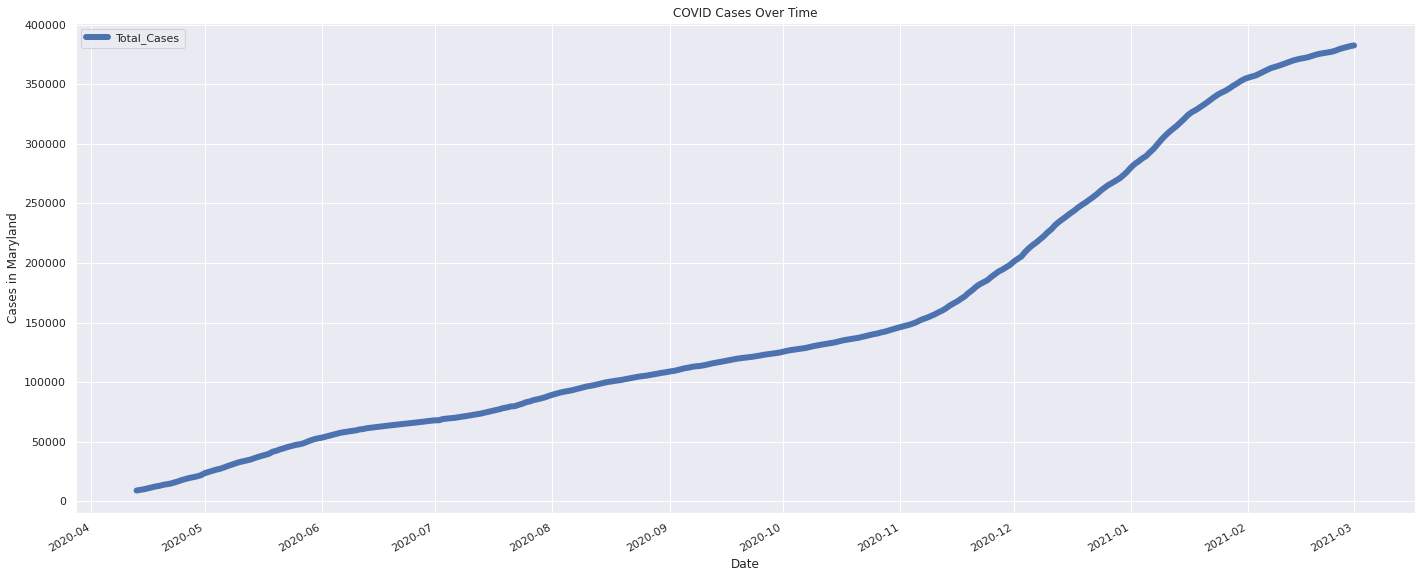

In [555]:
ax=df1[['Total_Cases']].plot(figsize=(24,10), lw=6, title='COVID Cases Over Time');
ax.set_xlabel("Date")
ax.set_ylabel("Cases in Maryland")

Text(0, 0.5, 'Cases in Maryland')

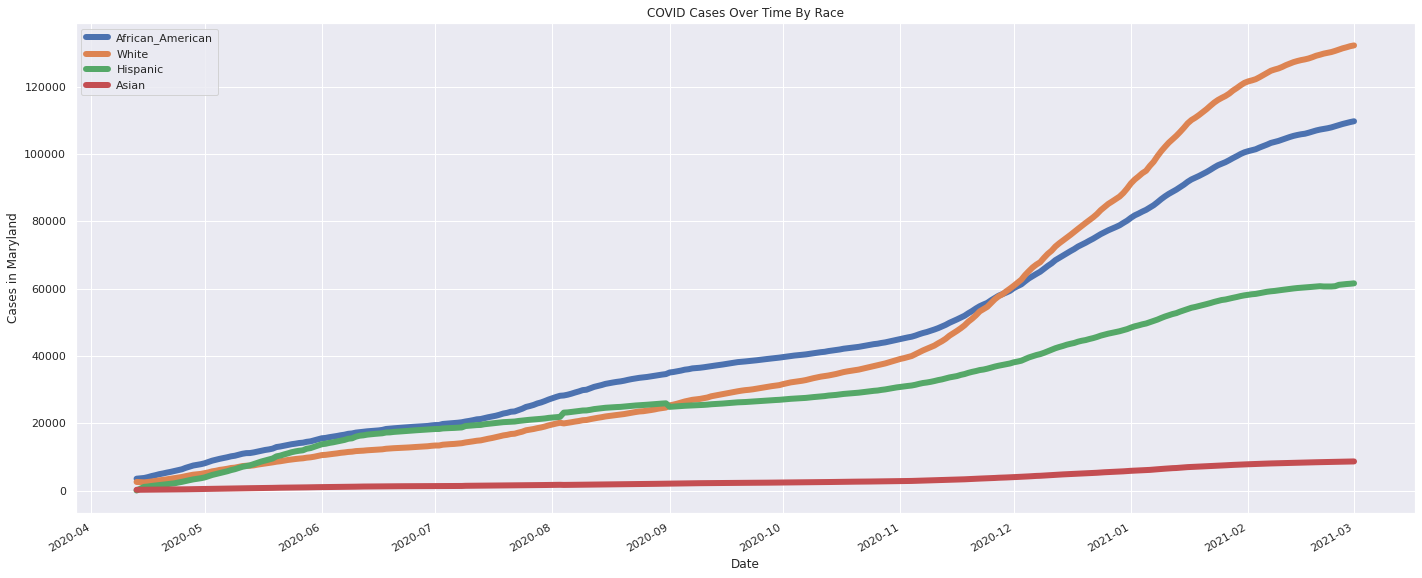

In [556]:
ax=df1[['African_American', 'White', 'Hispanic', 'Asian']].plot(figsize=(24,10), lw=6, title='COVID Cases Over Time By Race');
ax.set_xlabel("Date")
ax.set_ylabel("Cases in Maryland")

In [557]:
print("Median Cases",df1['Total_Cases'].median())
print("Mean Cases",df1['Total_Cases'].mean())
print("Standard Dev Cases",df1['Total_Cases'].std())
print("Variance Cases",df1['Total_Cases'].var())
print("Max Cases",df1['Total_Cases'].max())
print("Min Cases",df1['Total_Cases'].min())

Median Cases 120740.0
Mean Cases 154180.15217391305
Standard Dev Cases 109290.68853482451
Variance Cases 11944454600.416021
Max Cases 382702.0
Min Cases 8936.0


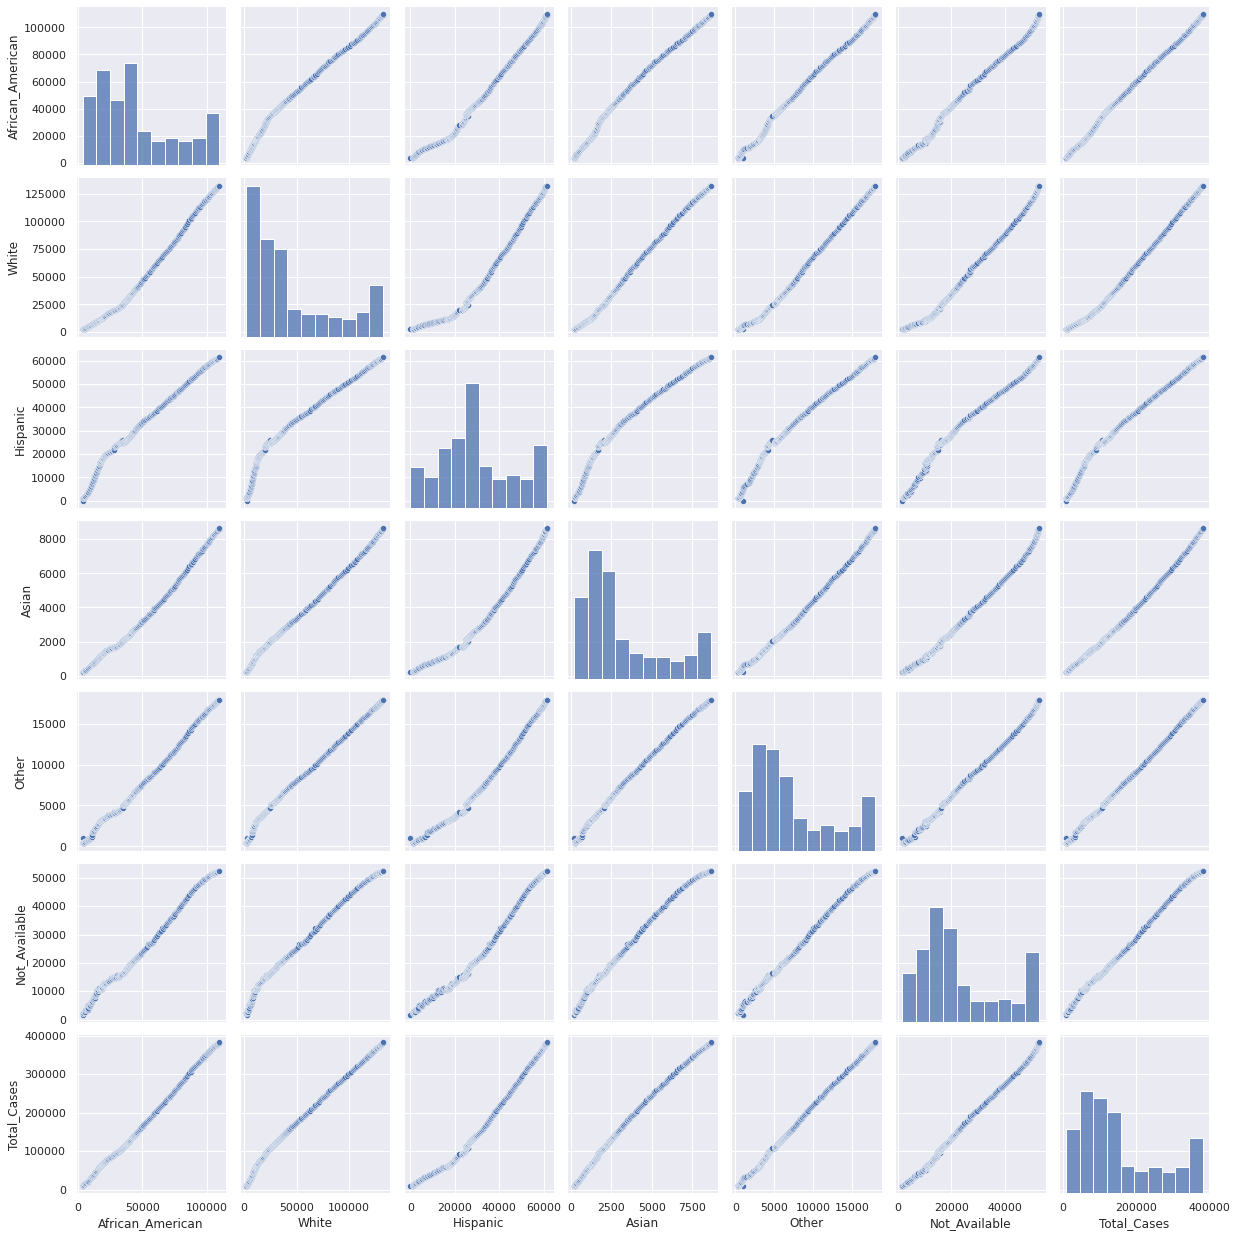

In [558]:
sns.pairplot(df1)

In [559]:
#New DataFrame to calculate distrabutions 
df2=df1

## Calculating Distribution by Race For Cases and Vaccinations 

In [560]:
#For loops through cases to calculate distributions for each race
AfAm_Dist = []
for index, row in df2.iterrows():
     AfAm_Dist.append((row.African_American / row.	Total_Cases * 100))

White_Dist = []
for index, row in df2.iterrows():
     White_Dist.append((row.White / row.Total_Cases * 100))

Hispanic_Dist = []
for index, row in df2.iterrows():
     Hispanic_Dist.append((row.Hispanic / row.Total_Cases * 100))

Asian_Dist = []
for index, row in df2.iterrows():
     Asian_Dist.append((row.Asian / row.Total_Cases * 100))    

Other_Dist = []
for index, row in df2.iterrows():
     Other_Dist.append((row.Other / row.Total_Cases * 100))

Not_Available_Dist = []
for index, row in df2.iterrows():
     Not_Available_Dist.append((row.Not_Available / row.Total_Cases * 100))      

In [561]:
df2['AfAm_Dist'] = AfAm_Dist

df2['White_Dist'] = White_Dist

df2['Hispanic_Dist'] = Hispanic_Dist

df2['Asian_Dist'] = Asian_Dist

df2['Other_Dist'] = Other_Dist

df2['Not_Available_Dist'] = Not_Available_Dist

In [562]:
df2.head()

African_American   White  ...  Other_Dist  Not_Available_Dist
DATE                                  ...                                
2020-04-13            3512.0  2547.0  ...   10.754252           19.080125
2020-04-15            3724.0  2425.0  ...    3.558612           22.139155
2020-04-16            3978.0  2535.0  ...    3.486647           22.959941
2020-04-17            4301.0  2681.0  ...    3.707224           22.053232
2020-04-18            4557.0  2869.0  ...    3.721157           21.685083

[5 rows x 13 columns]

In [563]:
print("Avg AfAm Dist",df2['AfAm_Dist'].mean())
print("Avg White Dist",df2['White_Dist'].mean())
print("Avg Hispanic Dist", df2['Hispanic_Dist'].mean())
print("Avg Asian Dist",df2['Asian_Dist'].mean())
print("Avg Other Dist",df2['Other_Dist'].mean())
print("Avg NA Dist",df2['Not_Available_Dist'].mean())

Avg AfAm Dist 30.47488269838374
Avg White Dist 25.965697025529757
Avg Hispanic Dist 20.97038381951248
Avg Asian Dist 1.98658710399332
Avg Other Dist 4.612162328822032
Avg NA Dist 15.990287023758649


Text(0, 0.5, 'Distribution Cases in Maryland')

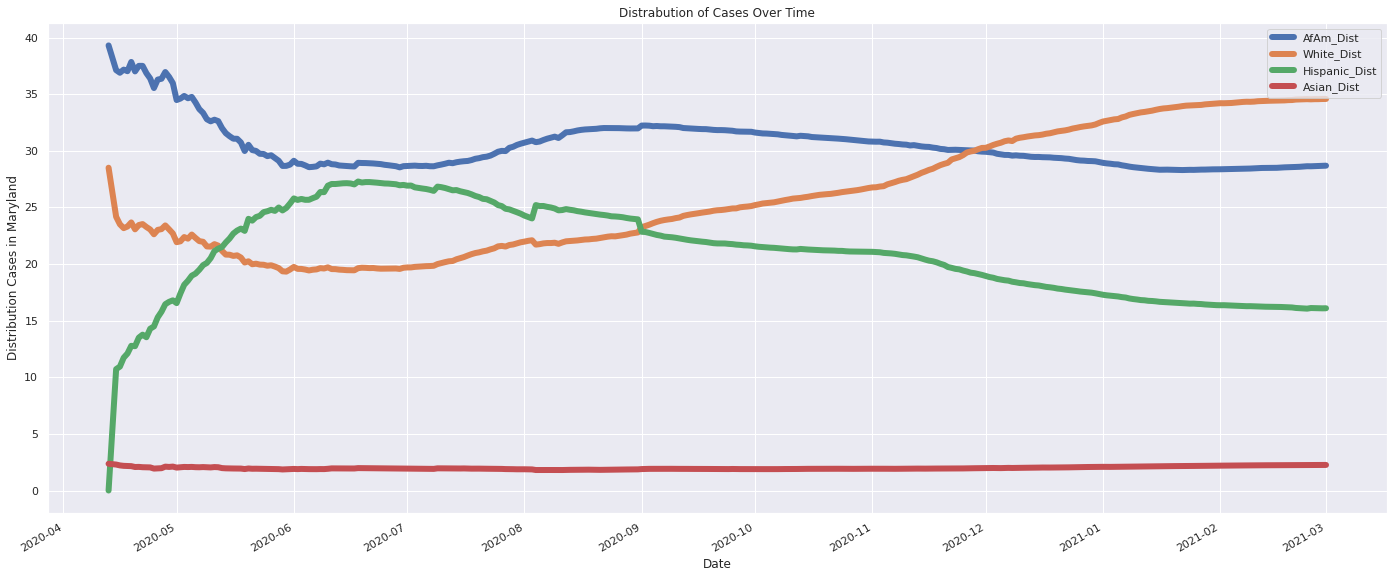

In [564]:
#Black and White Distrabution tend to have higher reported Cases over time 
ax=df2[['AfAm_Dist', 'White_Dist', 'Hispanic_Dist', 'Asian_Dist']].plot(figsize=(24,10), lw=6, title='Distrabution of Cases Over Time');
ax.set_xlabel("Date")
ax.set_ylabel("Distribution Cases in Maryland")

In [565]:
#Vaccination by Race in MD Dataset
path='/content/MD_COVID19_TotalVaccinationsStatewideFirstandSecondDose.xlsx'
df3 = pd.read_excel(path, skiprows=[0])

In [566]:
df3.head()

OBJECTID  ... American_Indian_Alaska_Native
0         1  ...                             0
1         1  ...                             0
2         1  ...                             1
3         1  ...                             5
4         1  ...                            18

[5 rows x 11 columns]

In [567]:
df3.dtypes

OBJECTID                                   int64
DATE                                      object
CumulativeTotalVaccinatedDoseOn            int64
CumulativeTotalVaccinatedDoseTw            int64
CumulativeTotalVaccinated                  int64
White_Vacc                                 int64
Black_Or_African_American                  int64
Asian_Vacc                                 int64
Other_Race                                 int64
Native_Hawaiian_Other_Pacific_Islander     int64
American_Indian_Alaska_Native              int64
dtype: object

In [568]:
df3=df3.drop(['OBJECTID'], axis=1)

In [569]:
df3['DATE'] = pd.to_datetime(df3['DATE'])

In [570]:
df3=df3.set_index('DATE')

In [571]:
df3.index

DatetimeIndex(['2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31', '2021-01-01', '2021-01-02',
               '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30',
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
      

In [572]:
df3.head()

CumulativeTotalVaccinatedDoseOn  ...  American_Indian_Alaska_Native
DATE                                         ...                               
2020-12-14                                2  ...                              0
2020-12-15                                9  ...                              0
2020-12-16                              545  ...                              1
2020-12-17                             1583  ...                              5
2020-12-18                             4423  ...                             18

[5 rows x 9 columns]

## SQL Dataset Joins And Verification

In [573]:
# Outer Join between Cases and Vacc Datasets 
df4 = pd.merge(df2, df3, on='DATE', how='outer')

In [574]:
df4

African_American  ...  American_Indian_Alaska_Native
DATE                          ...                               
2020-04-13            3512.0  ...                            NaN
2020-04-15            3724.0  ...                            NaN
2020-04-16            3978.0  ...                            NaN
2020-04-17            4301.0  ...                            NaN
2020-04-18            4557.0  ...                            NaN
...                      ...  ...                            ...
2021-02-25          108638.0  ...                           65.0
2021-02-26          108964.0  ...                          181.0
2021-02-27          109265.0  ...                           75.0
2021-02-28          109532.0  ...                           45.0
2021-03-01          109768.0  ...                           84.0

[322 rows x 22 columns]

In [575]:
df4.loc['2020-12-28']

African_American                           78325.000000
White                                      86664.000000
Hispanic                                   47107.000000
Asian                                       5588.000000
Other                                      12364.000000
Not_Available                              39135.000000
Total_Cases                               269183.000000
AfAm_Dist                                     29.097306
White_Dist                                    32.195198
Hispanic_Dist                                 17.499991
Asian_Dist                                     2.075911
Other_Dist                                     4.593158
Not_Available_Dist                            14.538437
CumulativeTotalVaccinatedDoseOn            36376.000000
CumulativeTotalVaccinatedDoseTw               14.000000
CumulativeTotalVaccinated                  36390.000000
White_Vacc                                  5172.000000
Black_Or_African_American                   1212

In [576]:
df4['TotalWhite_Vacc'] = df4.White_Vacc.cumsum()
df4['TotalBlackOrAfricanAmerican_Vacc'] = df4.Black_Or_African_American.cumsum()
df4['TotalAsian_Vacc'] = df4.Asian_Vacc.cumsum()
df4['TotalOther_Race_Vacc'] = df4.Other_Race.cumsum()
df4['TotalNative_Hawaiian_Other_Pacific_Islander_Vacc'] = df4.Native_Hawaiian_Other_Pacific_Islander.cumsum()
df4['TotalAmerican_Indian_Alaska_Native_Vacc'] = df4.American_Indian_Alaska_Native.cumsum()

In [577]:
#Checking new columns were aded
df4.head()

African_American  ...  TotalAmerican_Indian_Alaska_Native_Vacc
DATE                          ...                                         
2020-04-13            3512.0  ...                                      NaN
2020-04-15            3724.0  ...                                      NaN
2020-04-16            3978.0  ...                                      NaN
2020-04-17            4301.0  ...                                      NaN
2020-04-18            4557.0  ...                                      NaN

[5 rows x 28 columns]

In [578]:
df4.loc['2020-12-28']

African_American                                     78325.000000
White                                                86664.000000
Hispanic                                             47107.000000
Asian                                                 5588.000000
Other                                                12364.000000
Not_Available                                        39135.000000
Total_Cases                                         269183.000000
AfAm_Dist                                               29.097306
White_Dist                                              32.195198
Hispanic_Dist                                           17.499991
Asian_Dist                                               2.075911
Other_Dist                                               4.593158
Not_Available_Dist                                      14.538437
CumulativeTotalVaccinatedDoseOn                      36376.000000
CumulativeTotalVaccinatedDoseTw                         14.000000
Cumulative

In [579]:
#Check to confirm totals match the calculated values in the new columns
df4.loc['2020-12-28', 'TotalWhite_Vacc'] + df4.loc['2020-12-28', 'TotalBlackOrAfricanAmerican_Vacc'] + df4.loc['2020-12-28', 'TotalAsian_Vacc'] + df4.loc['2020-12-28', 'TotalOther_Race_Vacc'] + df4.loc['2020-12-28', 'TotalNative_Hawaiian_Other_Pacific_Islander_Vacc'] + df4.loc['2020-12-28', 'TotalAmerican_Indian_Alaska_Native_Vacc']

40520.0

Text(0, 0.5, 'Cases in Maryland')

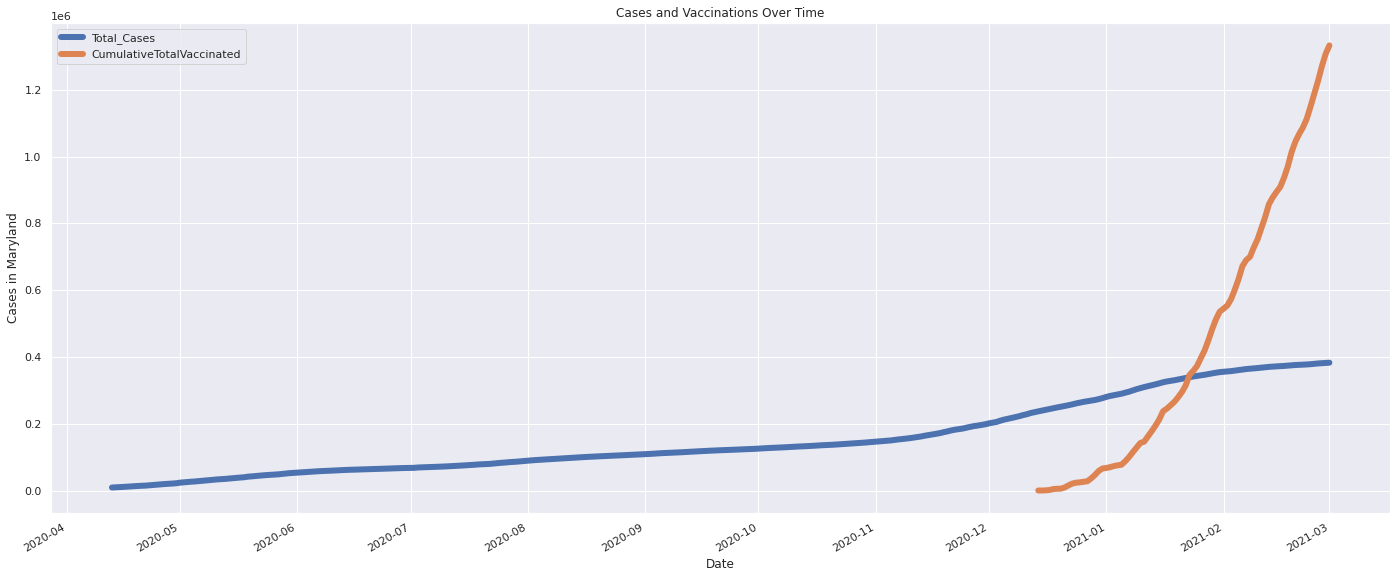

In [580]:
ax=df4[['Total_Cases','CumulativeTotalVaccinated']].plot(figsize=(24,10), lw=6, title='Cases and Vaccinations Over Time');
ax.set_xlabel("Date")
ax.set_ylabel("Cases in Maryland")

In [581]:
df5=df4

In [582]:
df5

African_American  ...  TotalAmerican_Indian_Alaska_Native_Vacc
DATE                          ...                                         
2020-04-13            3512.0  ...                                      NaN
2020-04-15            3724.0  ...                                      NaN
2020-04-16            3978.0  ...                                      NaN
2020-04-17            4301.0  ...                                      NaN
2020-04-18            4557.0  ...                                      NaN
...                      ...  ...                                      ...
2021-02-25          108638.0  ...                                   5507.0
2021-02-26          108964.0  ...                                   5688.0
2021-02-27          109265.0  ...                                   5763.0
2021-02-28          109532.0  ...                                   5808.0
2021-03-01          109768.0  ...                                   5892.0

[322 rows x 28 columns]

In [583]:
WhiteVacc_Dist = []
for index, row in df5.iterrows():
     WhiteVacc_Dist.append((row.TotalWhite_Vacc / row.CumulativeTotalVaccinated * 100))

AfAmVacc_Dist = []
for index, row in df5.iterrows():
     AfAmVacc_Dist.append((row.TotalBlackOrAfricanAmerican_Vacc / row.CumulativeTotalVaccinated * 100))

AsianVacc_Dist = []
for index, row in df5.iterrows():
     AsianVacc_Dist.append((row.TotalAsian_Vacc / row.CumulativeTotalVaccinated * 100))    

OtherVacc_Dist = []
for index, row in df5.iterrows():
     OtherVacc_Dist.append((row.TotalOther_Race_Vacc / row.CumulativeTotalVaccinated * 100))

Native_Hawaiian_Other_Pacific_Islander_Vacc_Dist = []
for index, row in df5.iterrows():
     Native_Hawaiian_Other_Pacific_Islander_Vacc_Dist.append((row.TotalNative_Hawaiian_Other_Pacific_Islander_Vacc  / row.CumulativeTotalVaccinated * 100)) 

American_Indian_Alaska_Native_Vacc_Dist = []
for index, row in df5.iterrows():
     American_Indian_Alaska_Native_Vacc_Dist.append((row.TotalAmerican_Indian_Alaska_Native_Vacc / row.CumulativeTotalVaccinated * 100)) 

In [584]:
df5['WhiteVacc_Dist'] = WhiteVacc_Dist

df5['AfAmVacc_Dist'] = AfAmVacc_Dist

df5['AsianVacc_Dist'] = AsianVacc_Dist

df5['OtherVacc_Dist'] = OtherVacc_Dist

df5['Native_Hawaiian_Other_Pacific_Islander_Vacc_Dist'] = Native_Hawaiian_Other_Pacific_Islander_Vacc_Dist

df5['American_Indian_Alaska_Native_Vacc_Dist'] = American_Indian_Alaska_Native_Vacc_Dist

In [585]:
df5.loc['2020-12-28']

African_American                                     78325.000000
White                                                86664.000000
Hispanic                                             47107.000000
Asian                                                 5588.000000
Other                                                12364.000000
Not_Available                                        39135.000000
Total_Cases                                         269183.000000
AfAm_Dist                                               29.097306
White_Dist                                              32.195198
Hispanic_Dist                                           17.499991
Asian_Dist                                               2.075911
Other_Dist                                               4.593158
Not_Available_Dist                                      14.538437
CumulativeTotalVaccinatedDoseOn                      36376.000000
CumulativeTotalVaccinatedDoseTw                         14.000000
Cumulative

In [586]:
df5.head()

African_American  ...  American_Indian_Alaska_Native_Vacc_Dist
DATE                          ...                                         
2020-04-13            3512.0  ...                                      NaN
2020-04-15            3724.0  ...                                      NaN
2020-04-16            3978.0  ...                                      NaN
2020-04-17            4301.0  ...                                      NaN
2020-04-18            4557.0  ...                                      NaN

[5 rows x 34 columns]

Text(0, 0.5, 'Vaccine Distribution in Maryland')

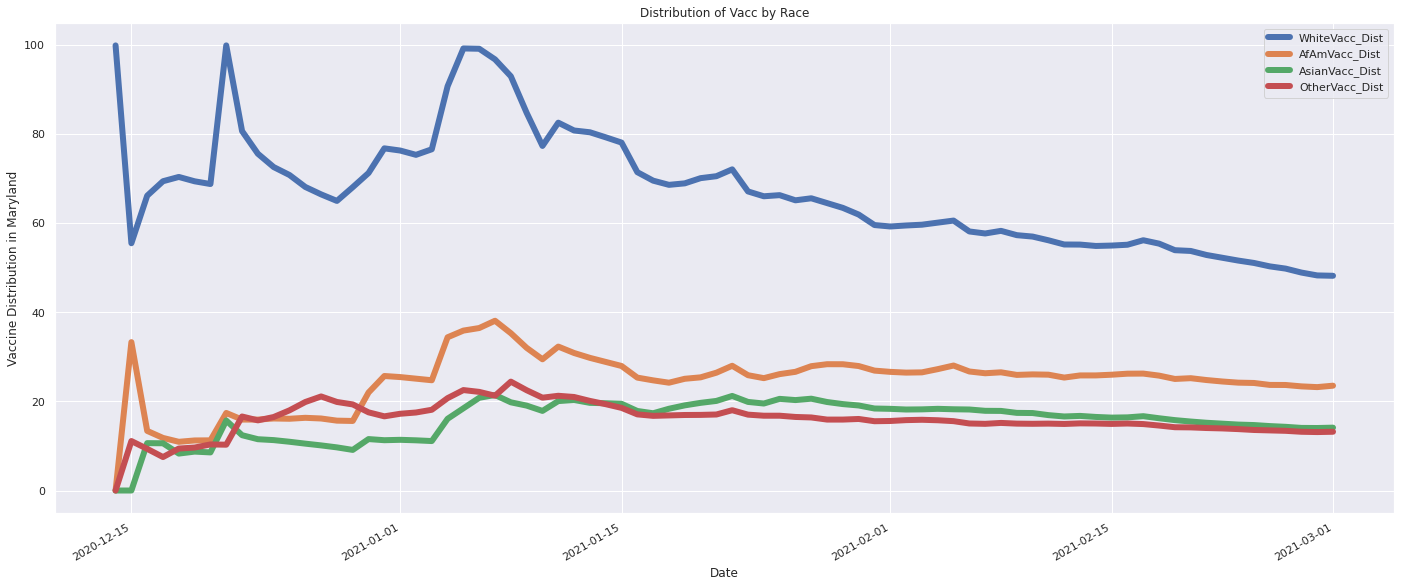

In [587]:
#Unequal Vaccine Distrabution Rates
ax=df5[['WhiteVacc_Dist', 'AfAmVacc_Dist', 'AsianVacc_Dist', 'OtherVacc_Dist']].plot(figsize=(24,10), lw=6, title='Distribution of Vacc by Race');
ax.set_xlabel("Date")
ax.set_ylabel("Vaccine Distribution in Maryland")

# Cases and Vaccine Data Analysis

I am exploring the dataset to identify if there is inequality between each race in cases or vaccine distribution. I need to confirm in there is a "K" shaped style recovery. 

In [588]:
x=df5[['White_Dist','AfAm_Dist','Hispanic_Dist','Asian_Dist','Other_Dist']]

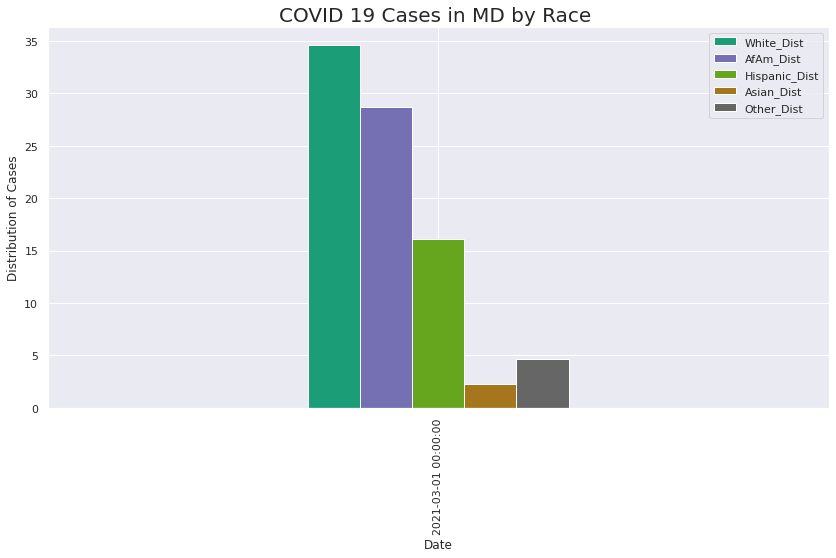

In [589]:
# Distribution of Cases as of 03/01
ax = x['2021-03-01':].plot(label='observed', kind='bar', figsize=(14, 7),width=.25, colormap='Dark2')
ax.set_xlabel('Date')
ax.set_ylabel('Distribution of Cases')
plt.title("COVID 19 Cases in MD by Race ", fontsize=20)
plt.legend()
plt.show()

In [590]:
x=df5[['WhiteVacc_Dist','AfAmVacc_Dist','AsianVacc_Dist','OtherVacc_Dist','Native_Hawaiian_Other_Pacific_Islander_Vacc_Dist']]

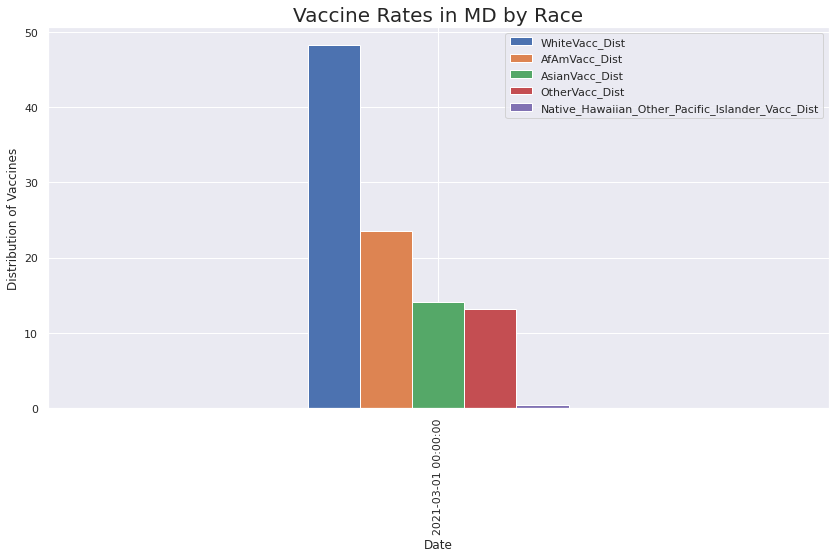

In [591]:
#Vaccine distribution by race. Majority of vaccines are given to White individuals. 
ax = x['2021-03-01':].plot(label='observed', kind='bar', figsize=(14, 7),width=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Distribution of Vaccines')
plt.title("Vaccine Rates in MD by Race", fontsize=20)
plt.legend()
plt.show()

# Economic Data Preperation and Cleaning

In [592]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
path= '/content/SeriesReport-20210228180835_bbfb44.xlsx'
df6 = pd.read_excel(path,date_parser=parser)

In [593]:
df6.head()

DATE Period  ...  Asian_UnempRate  HispanicOrLatino_UnempRate
0  2020-01    Jan  ...              3.1                         4.3
1  2020-02    Feb  ...              2.4                         4.4
2  2020-03    Mar  ...              4.1                         6.0
3  2020-04    Apr  ...             12.5                        15.9
4  2020-05    May  ...             13.9                        16.4

[5 rows x 12 columns]

In [594]:
df6=df6.drop(['Period'], axis=1)

In [595]:
df6['DATE'] = pd.to_datetime(df6['DATE'])

In [596]:
df6=df6.set_index('DATE')

In [597]:
df6.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [598]:
df6

laborforceparticipationrate  ...  HispanicOrLatino_UnempRate
DATE                                     ...                            
2020-01-01                         68.7  ...                         4.3
2020-02-01                         68.8  ...                         4.4
2020-03-01                         68.9  ...                         6.0
2020-04-01                         65.2  ...                        15.9
2020-05-01                         65.3  ...                        16.4
2020-06-01                         67.4  ...                        14.5
2020-07-01                         67.9  ...                        12.7
2020-08-01                         67.9  ...                        10.5
2020-09-01                         64.6  ...                        10.3
2020-10-01                         65.9  ...                         8.8
2020-11-01                         65.6  ...                         8.4
2020-12-01                         65.6  ...                         9.3
2021-01-01                         65.6  ...                         9.2
2021-02-01                         64.3  ...                         9.3
2021-03-01                         64.7  ...                         9.2

[15 rows x 10 columns]

## Unemployment Estimation Via Interpolation

Due to reporting standards, unemployment and consumption data is only on a monthly basis. To match the COVID dataset, I will need to upsample and estimate daily data through interpolation. 

In [599]:
# Changing from monthly to Daily
DailyUnemp = df6.resample('D')

In [600]:
DailyUnempEstimate = DailyUnemp.interpolate(method='linear')

In [601]:
# Estimating 30 days worth of unemployment data
print(DailyUnempEstimate.head(30))

            laborforceparticipationrate  ...  HispanicOrLatino_UnempRate
DATE                                     ...                            
2020-01-01                    68.700000  ...                    4.300000
2020-01-02                    68.703226  ...                    4.303226
2020-01-03                    68.706452  ...                    4.306452
2020-01-04                    68.709677  ...                    4.309677
2020-01-05                    68.712903  ...                    4.312903
2020-01-06                    68.716129  ...                    4.316129
2020-01-07                    68.719355  ...                    4.319355
2020-01-08                    68.722581  ...                    4.322581
2020-01-09                    68.725806  ...                    4.325806
2020-01-10                    68.729032  ...                    4.329032
2020-01-11                    68.732258  ...                    4.332258
2020-01-12                    68.735484  ...       

In [602]:
DailyUnempEstimate.head()

laborforceparticipationrate  ...  HispanicOrLatino_UnempRate
DATE                                     ...                            
2020-01-01                    68.700000  ...                    4.300000
2020-01-02                    68.703226  ...                    4.303226
2020-01-03                    68.706452  ...                    4.306452
2020-01-04                    68.709677  ...                    4.309677
2020-01-05                    68.712903  ...                    4.312903

[5 rows x 10 columns]

In [603]:
DailyUnempEstimate.shape

(426, 10)

In [604]:
DailyUnempEstimate.dtypes

laborforceparticipationrate    float64
employment-populationratio     float64
laborforce                     float64
employment                     float64
unemployment                   float64
unemploymentrate               float64
White_UnempRate                float64
Black_UnempRate                float64
Asian_UnempRate                float64
HispanicOrLatino_UnempRate     float64
dtype: object

## Unemployment Data Analysis

## Consumer Expenditure Estimation and Analysis

Text(0, 0.5, 'Unemployment Rate')

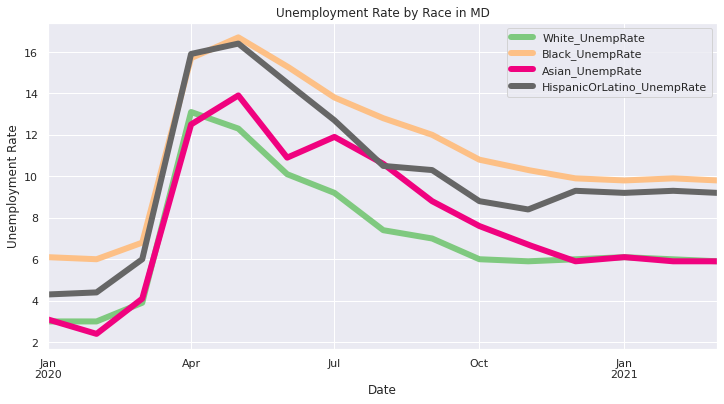

In [605]:
ax=DailyUnempEstimate[['White_UnempRate','Black_UnempRate','Asian_UnempRate','HispanicOrLatino_UnempRate']].plot(figsize=(12,6), lw=6, colormap='Accent',title='Unemployment Rate by Race in MD');
ax.set_xlabel("Date")
ax.set_ylabel("Unemployment Rate")

In [606]:
DailyUnempEstimate.loc['2020-04-10']

laborforceparticipationrate         65.23
employment-populationratio          58.66
laborforce                     3113190.70
employment                     2799087.70
unemployment                    314103.00
unemploymentrate                    10.07
White_UnempRate                     12.86
Black_UnempRate                     16.00
Asian_UnempRate                     12.92
HispanicOrLatino_UnempRate          16.05
Name: 2020-04-10 00:00:00, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


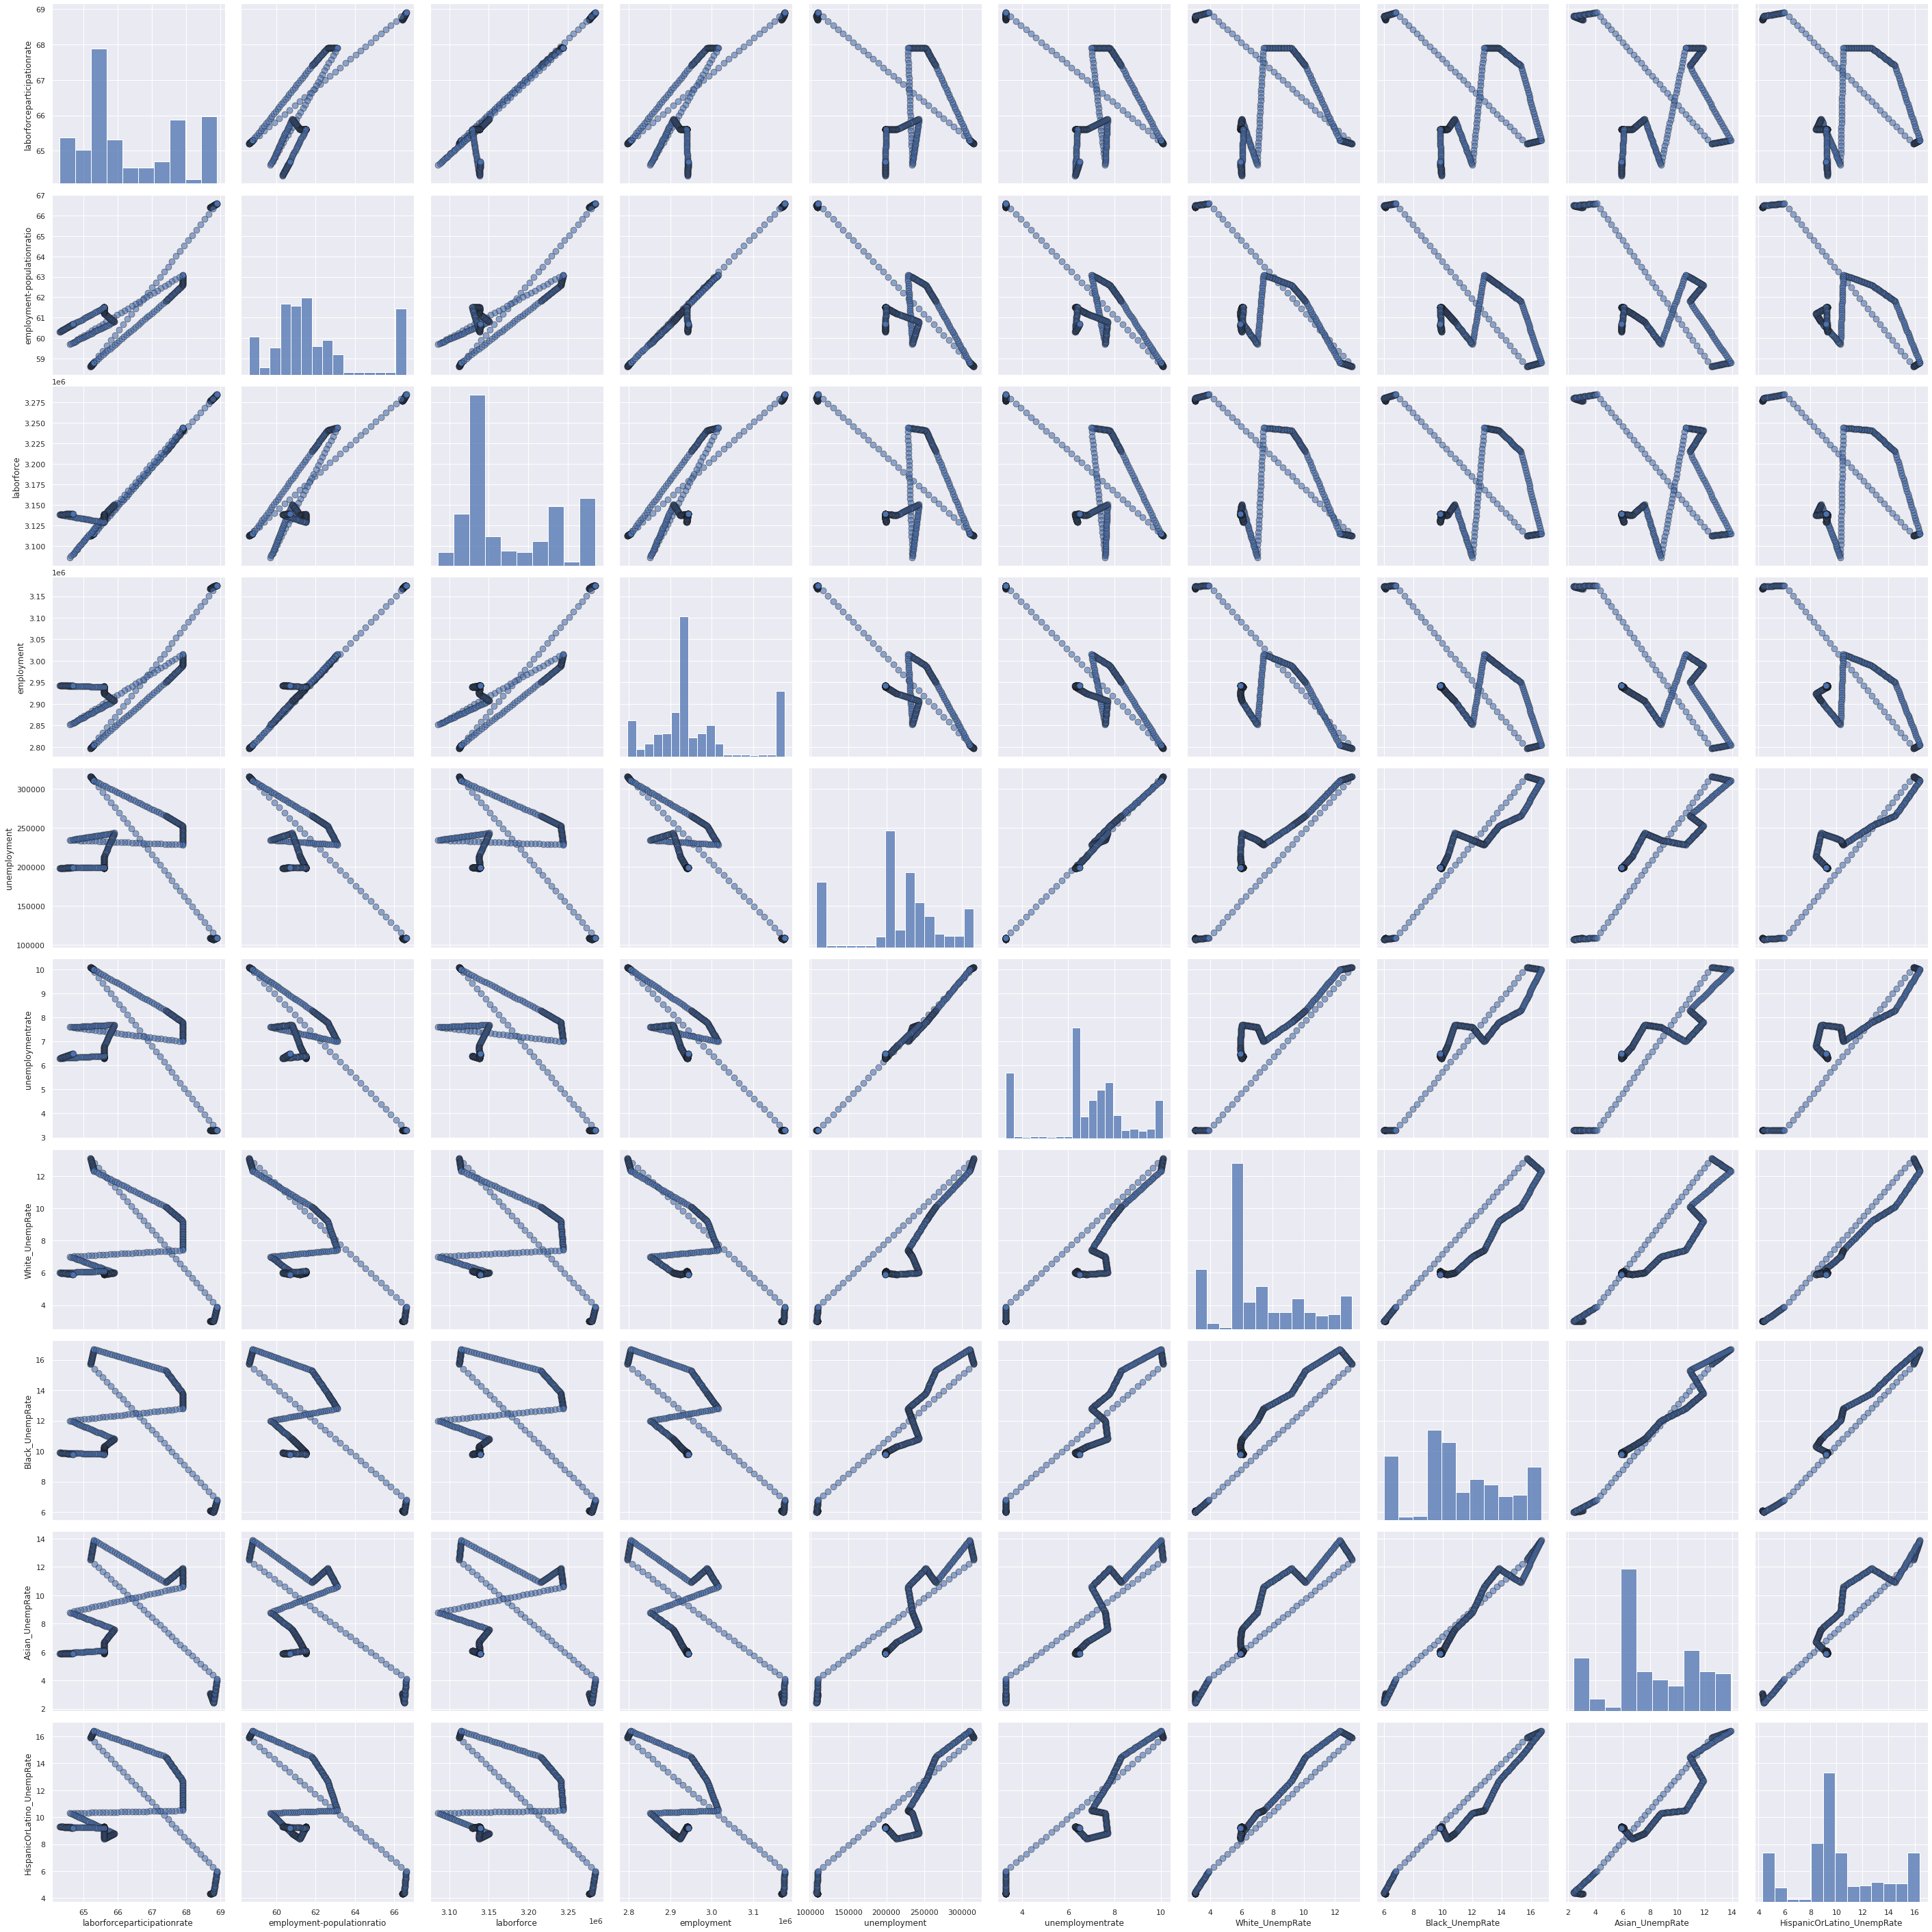

In [607]:
sns.pairplot(DailyUnempEstimate,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)

In [608]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
path = '/content/PCE.xls'
df7 = pd.read_excel(path, date_parser=parser)

In [609]:
df7.head()

DATE      PCE     Change  ...  Black_PCE  Asian_PCE  HispanicOrLatino_PCE
0 2020-03-01  13878.5  -0.020000  ...       -8.1      -0.91                  -4.1
1 2020-04-01  12112.1 -12.727600  ...      -11.3      -2.40                  -9.9
2 2020-05-01  13165.4   8.696262  ...        2.4       4.10                   3.1
3 2020-06-01  14014.6   6.450241  ...        2.4       3.40                   1.8
4 2020-07-01  14224.7   1.499151  ...        1.1       0.90                   2.3

[5 rows x 7 columns]

In [610]:
df7.dtypes

DATE                    datetime64[ns]
PCE                            float64
Change                         float64
White_PCE                      float64
Black_PCE                      float64
Asian_PCE                      float64
HispanicOrLatino_PCE           float64
dtype: object

In [611]:
df7=df7.set_index('DATE')

In [612]:
df7.index

DatetimeIndex(['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [613]:
df7.head()

PCE     Change  ...  Asian_PCE  HispanicOrLatino_PCE
DATE                            ...                                 
2020-03-01  13878.5  -0.020000  ...      -0.91                  -4.1
2020-04-01  12112.1 -12.727600  ...      -2.40                  -9.9
2020-05-01  13165.4   8.696262  ...       4.10                   3.1
2020-06-01  14014.6   6.450241  ...       3.40                   1.8
2020-07-01  14224.7   1.499151  ...       0.90                   2.3

[5 rows x 6 columns]

In [614]:
#Upsampling PCE Data
DailyPCE = df7.resample('D')

In [615]:
DailyPCEEstimate = DailyPCE.interpolate(method='linear')

In [616]:
#Estimated 30 days of PCE Data
print(DailyPCEEstimate.head(30))

                     PCE     Change  ...  Asian_PCE  HispanicOrLatino_PCE
DATE                                 ...                                 
2020-03-01  13878.500000  -0.020000  ...  -0.910000             -4.100000
2020-03-02  13821.519355  -0.429923  ...  -0.958065             -4.287097
2020-03-03  13764.538710  -0.839845  ...  -1.006129             -4.474194
2020-03-04  13707.558065  -1.249768  ...  -1.054194             -4.661290
2020-03-05  13650.577419  -1.659690  ...  -1.102258             -4.848387
2020-03-06  13593.596774  -2.069613  ...  -1.150323             -5.035484
2020-03-07  13536.616129  -2.479536  ...  -1.198387             -5.222581
2020-03-08  13479.635484  -2.889458  ...  -1.246452             -5.409677
2020-03-09  13422.654839  -3.299381  ...  -1.294516             -5.596774
2020-03-10  13365.674194  -3.709303  ...  -1.342581             -5.783871
2020-03-11  13308.693548  -4.119226  ...  -1.390645             -5.970968
2020-03-12  13251.712903  -4.529148  .

In [617]:
DailyPCEEstimate

PCE    Change  ...  Asian_PCE  HispanicOrLatino_PCE
DATE                                ...                                 
2020-03-01  13878.500000 -0.020000  ...  -0.910000             -4.100000
2020-03-02  13821.519355 -0.429923  ...  -0.958065             -4.287097
2020-03-03  13764.538710 -0.839845  ...  -1.006129             -4.474194
2020-03-04  13707.558065 -1.249768  ...  -1.054194             -4.661290
2020-03-05  13650.577419 -1.659690  ...  -1.102258             -4.848387
...                  ...       ...  ...        ...                   ...
2021-02-25  15157.942857  1.666246  ...   0.300000              0.795714
2021-02-26  15167.657143  1.705302  ...   0.310000              0.811786
2021-02-27  15177.371429  1.744358  ...   0.320000              0.827857
2021-02-28  15187.085714  1.783414  ...   0.330000              0.843929
2021-03-01  15196.800000  1.822470  ...   0.340000              0.860000

[366 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


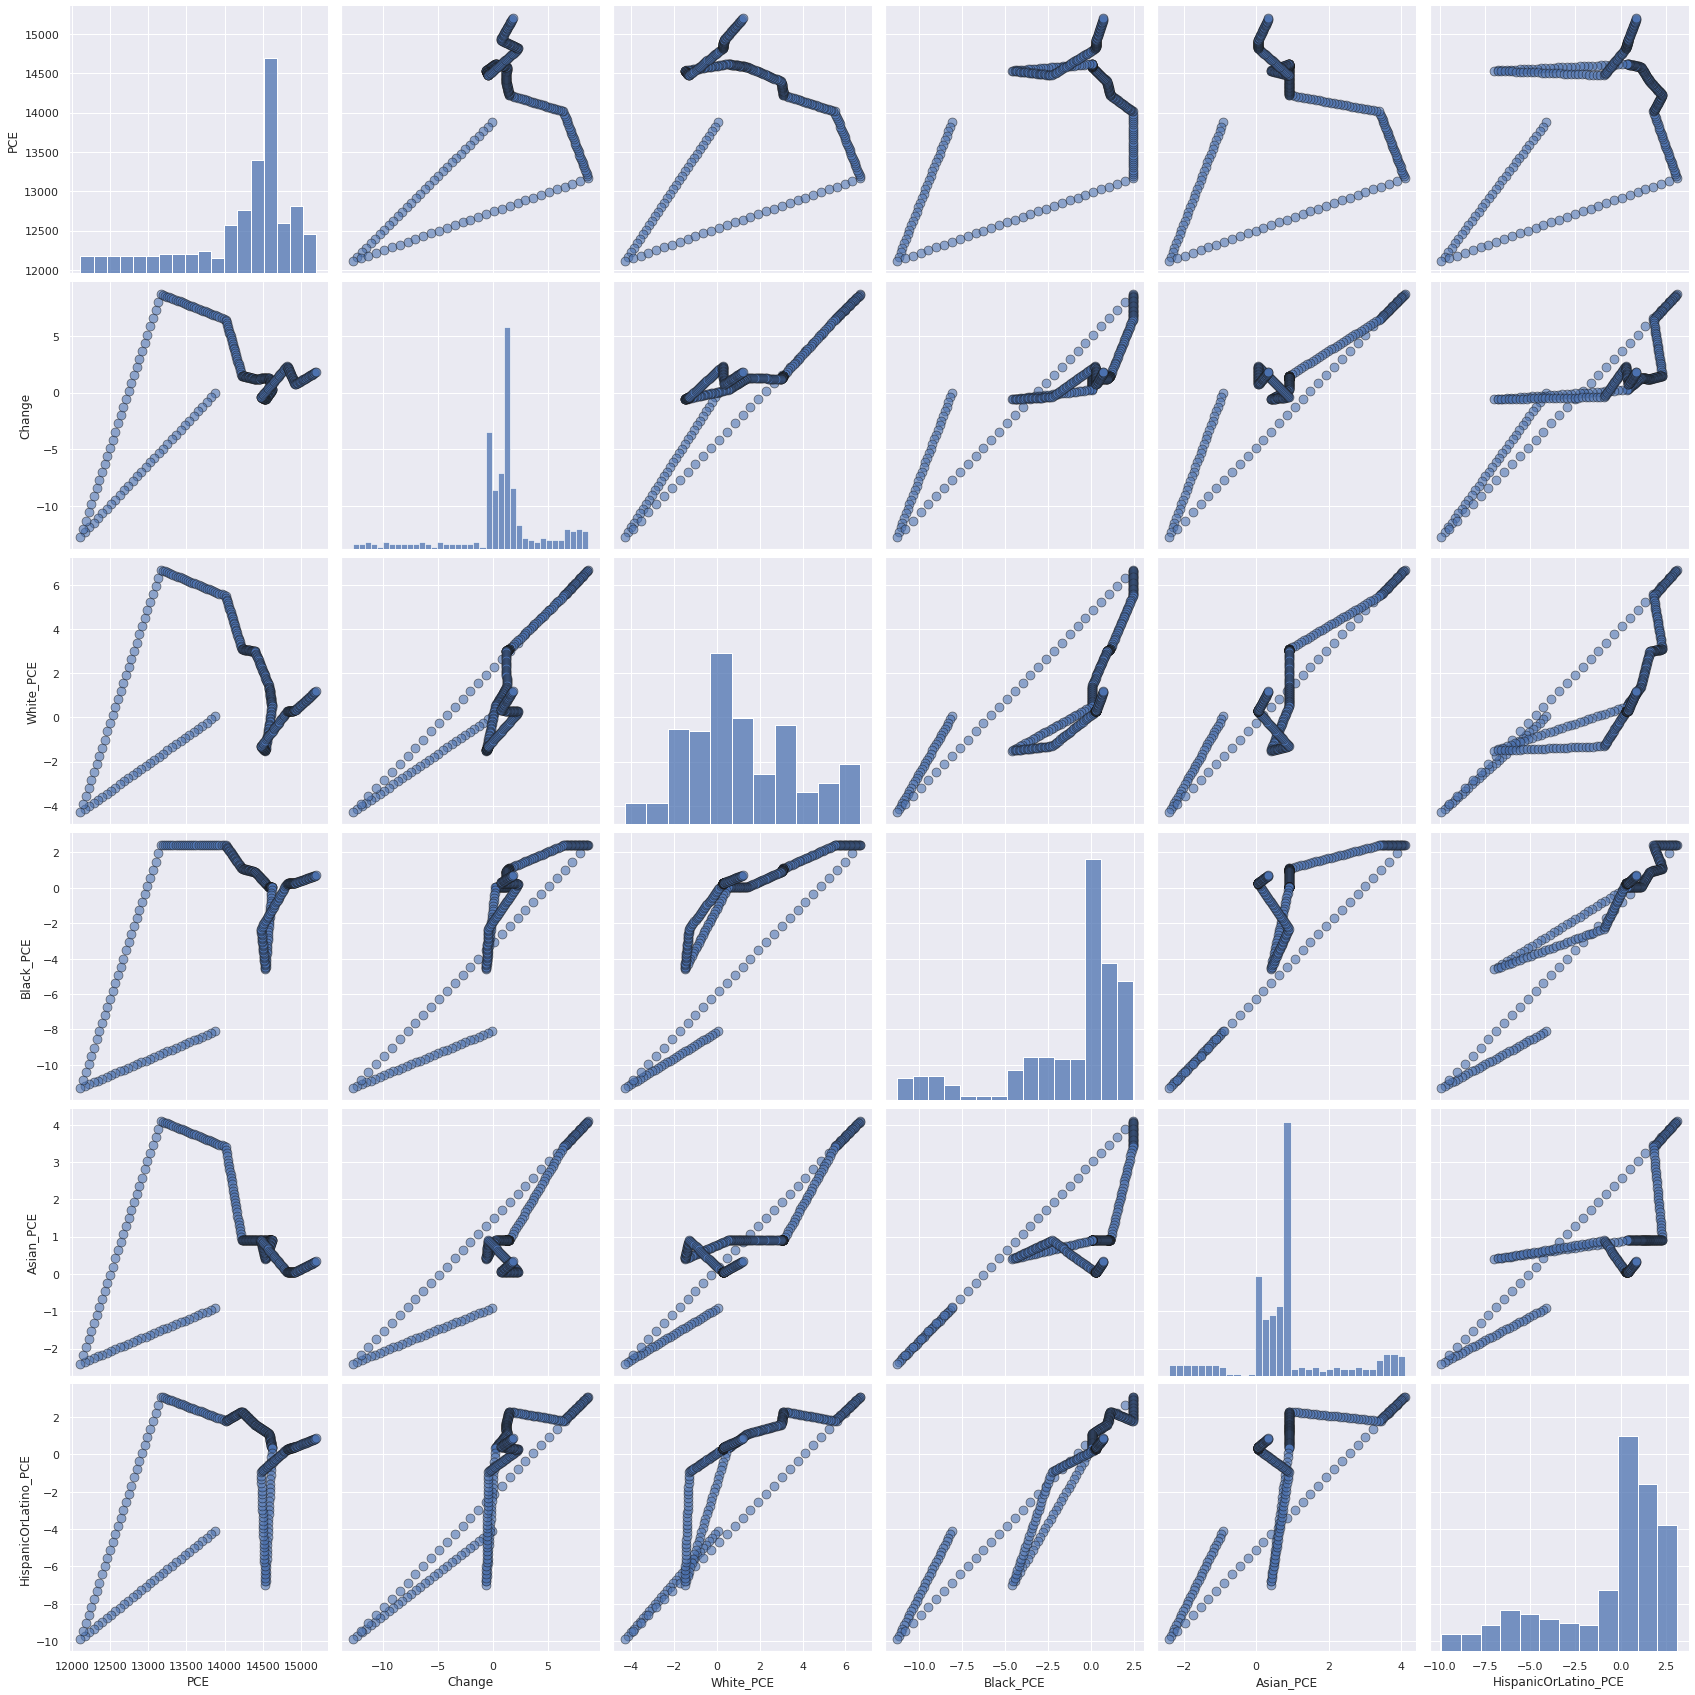

In [618]:
sns.pairplot(DailyPCEEstimate,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)

Text(0, 0.5, 'Changes in Consumption')

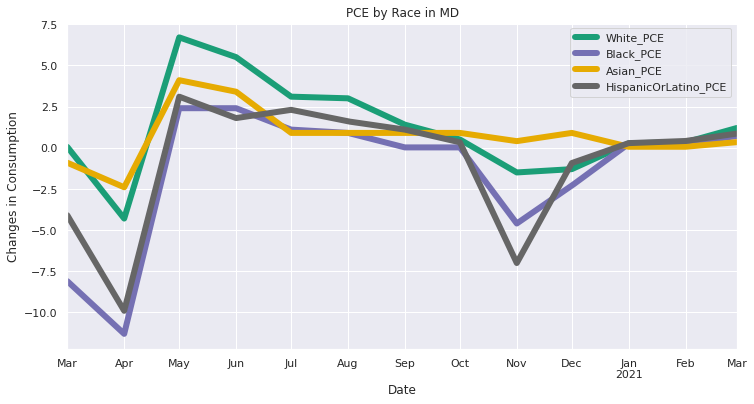

In [619]:
ax=DailyPCEEstimate[['White_PCE', 'Black_PCE', 'Asian_PCE','HispanicOrLatino_PCE']].plot(figsize=(12,6), lw=6, colormap='Dark2',title='PCE by Race in MD');
ax.set_xlabel("Date")
ax.set_ylabel("Changes in Consumption")

## SQL Dataset Joins and Verification

In [620]:
#Left Join for economic datasets 
df8 = pd.merge(DailyPCEEstimate, DailyUnempEstimate, on='DATE', how='left')

In [621]:
df8.head()

PCE    Change  ...  Asian_UnempRate  HispanicOrLatino_UnempRate
DATE                                ...                                             
2020-03-01  13878.500000 -0.020000  ...         4.100000                    6.000000
2020-03-02  13821.519355 -0.429923  ...         4.370968                    6.319355
2020-03-03  13764.538710 -0.839845  ...         4.641935                    6.638710
2020-03-04  13707.558065 -1.249768  ...         4.912903                    6.958065
2020-03-05  13650.577419 -1.659690  ...         5.183871                    7.277419

[5 rows x 16 columns]

In [622]:
# Outer Join of economic and COVID Datasets
df9 = pd.merge(df8, df5, on='DATE', how='outer')

In [623]:
df9.shape

(366, 50)

In [624]:
df9

PCE  ...  American_Indian_Alaska_Native_Vacc_Dist
DATE                      ...                                         
2020-03-01  13878.500000  ...                                      NaN
2020-03-02  13821.519355  ...                                      NaN
2020-03-03  13764.538710  ...                                      NaN
2020-03-04  13707.558065  ...                                      NaN
2020-03-05  13650.577419  ...                                      NaN
...                  ...  ...                                      ...
2021-02-25  15157.942857  ...                                 0.463628
2021-02-26  15167.657143  ...                                 0.463779
2021-02-27  15177.371429  ...                                 0.453845
2021-02-28  15187.085714  ...                                 0.444395
2021-03-01  15196.800000  ...                                 0.442147

[366 rows x 50 columns]

In [625]:
df9.loc['2020-12-31']

PCE                                                 1.480580e+04
Change                                              2.266330e+00
White_PCE                                           2.193548e-01
Black_PCE                                           1.580645e-01
Asian_PCE                                           8.709677e-02
HispanicOrLatino_PCE                                2.409677e-01
laborforceparticipationrate                         6.560000e+01
employment-populationratio                          6.150000e+01
laborforce                                          3.129006e+06
employment                                          2.939306e+06
unemployment                                        1.993227e+05
unemploymentrate                                    6.396774e+00
White_UnempRate                                     6.096774e+00
Black_UnempRate                                     9.803226e+00
Asian_UnempRate                                     6.093548e+00
HispanicOrLatino_UnempRat

In [626]:
df9=df9.round(5)

In [627]:
df10=df9

In [628]:
df10=df9[df9['AfAm_Dist'].notna()]

In [629]:
df10.shape

(322, 50)

# Regression Analysis

I am running regressions between the diffrent COVID and Economic fetures across all races to establish the relationship. As expected, the regressions show that as the pandemic worsened, unemplyment went up and concumption went down for minorities. 

In [630]:
X = df10[['AfAm_Dist']]
Y = df10[['Black_UnempRate']]
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)

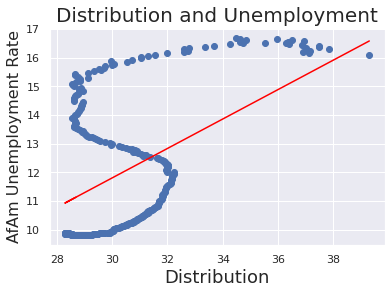

In [631]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Distribution and Unemployment", fontsize=20)
plt.xlabel('Distribution', fontsize=18)
plt.ylabel('AfAm Unemployment Rate', fontsize=16)
plt.figsize=(25,10)
plt.show()

In [632]:
X = df10[['AfAm_Dist']]
Y = df10[['Black_PCE']]
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)

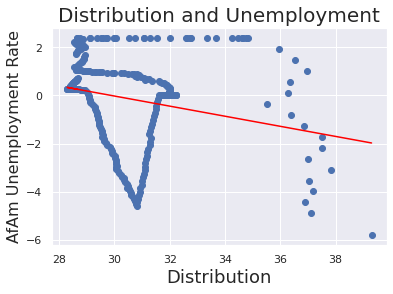

In [633]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Distribution and Unemployment", fontsize=20)
plt.xlabel('Distribution', fontsize=18)
plt.ylabel('AfAm Unemployment Rate', fontsize=16)
plt.figsize=(25,10)
plt.show()

In [634]:
X = df10[['White_Dist']]
Y = df10[['White_UnempRate']]
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)

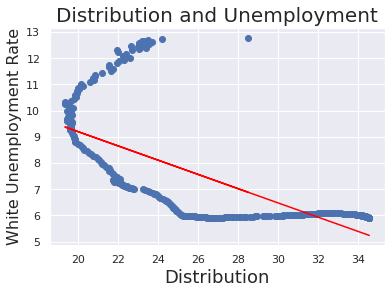

In [635]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Distribution and Unemployment", fontsize=20)
plt.xlabel('Distribution', fontsize=18)
plt.ylabel('White Unemployment Rate', fontsize=16)
plt.figsize=(25,10)
plt.show()

In [636]:
X = df10[['Asian_Dist']]
Y = df10[['Asian_UnempRate']]
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)

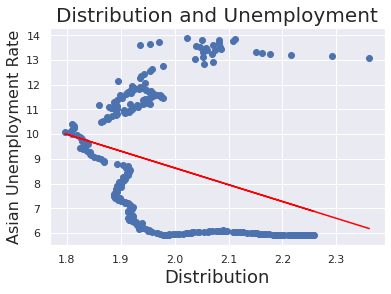

In [637]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Distribution and Unemployment", fontsize=20)
plt.xlabel('Distribution', fontsize=18)
plt.ylabel('Asian Unemployment Rate', fontsize=16)
plt.figsize=(25,10)
plt.show()

In [638]:
X = df10[['Hispanic_Dist']]
Y = df10[['HispanicOrLatino_UnempRate']]
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)

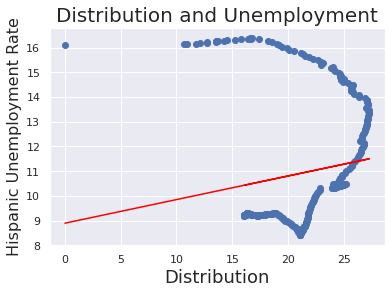

In [639]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Distribution and Unemployment", fontsize=20)
plt.xlabel('Distribution', fontsize=18)
plt.ylabel('Hispanic Unemployment Rate', fontsize=16)
plt.figsize=(25,10)
plt.show()

# Building ML Models

In this section, I will be building diffrent Machine Learning models to test my hypothesis. I will conduct a forcast after adjusting vaccine rates to asses the impact on unemployment and consumption. Then I will compare the accuracy of each model. 

## Vector autoregression (VAR) Model

In [640]:
#New DataFrame filtered down to the columns needed for VAR Model
vardata = df9[['TotalBlackOrAfricanAmerican_Vacc', 'AfAmVacc_Dist', 'Black_UnempRate']]

In [641]:
vardata=vardata.dropna()

In [642]:
vardata

TotalBlackOrAfricanAmerican_Vacc  AfAmVacc_Dist  Black_UnempRate
DATE                                                                        
2020-12-14                               0.0        0.00000          9.85806
2020-12-15                               3.0       33.33333          9.85484
2020-12-16                              73.0       13.39450          9.85161
2020-12-17                             187.0       11.81301          9.84839
2020-12-18                             484.0       10.94280          9.84516
...                                      ...            ...              ...
2021-02-25                          281799.0       23.72431          9.81429
2021-02-26                          290773.0       23.70857          9.81071
2021-02-27                          297093.0       23.39650          9.80714
2021-02-28                          303615.0       23.23091          9.80357
2021-03-01                          313845.0       23.55154          9.80000

[78 rows x 3 columns]

In [643]:
# Multiplying Total Vaccinations and Distribution to increase them by 20% for African Americans. Testing effect on unemployment. 
vardata['TotalBlackOrAfricanAmerican_Vacc'] = vardata['TotalBlackOrAfricanAmerican_Vacc'].multiply(1.2)
vardata['AfAmVacc_Dist'] = vardata['AfAmVacc_Dist'].multiply(1.2)

In [644]:
vardata

TotalBlackOrAfricanAmerican_Vacc  AfAmVacc_Dist  Black_UnempRate
DATE                                                                        
2020-12-14                               0.0       0.000000          9.85806
2020-12-15                               3.6      39.999996          9.85484
2020-12-16                              87.6      16.073400          9.85161
2020-12-17                             224.4      14.175612          9.84839
2020-12-18                             580.8      13.131360          9.84516
...                                      ...            ...              ...
2021-02-25                          338158.8      28.469172          9.81429
2021-02-26                          348927.6      28.450284          9.81071
2021-02-27                          356511.6      28.075800          9.80714
2021-02-28                          364338.0      27.877092          9.80357
2021-03-01                          376614.0      28.261848          9.80000

[78 rows x 3 columns]

In [645]:
adftest = adfuller(vardata['Black_UnempRate'], autolag= "AIC")
print("ADF", adftest[0])
print("P Value", adftest[1])

ADF -2.398001966347204
P Value 0.14230113323641286


In [646]:
adftest

(-2.398001966347204,
 0.14230113323641286,
 1,
 76,
 {'1%': -3.5194805351545413,
  '10%': -2.5874984279778395,
  '5%': -2.9003945086747343},
 -694.9054877931279)

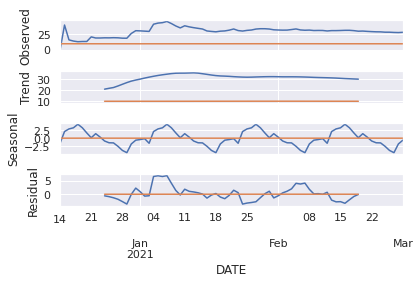

In [647]:
decomp = sm.tsa.seasonal_decompose(vardata[['AfAmVacc_Dist','Black_UnempRate']], model='additive',freq=20)
fig = decomp.plot()
plt.show()

In [648]:
train = vardata.iloc[:-20,:]
test1 = vardata.iloc[-20:,:]

In [649]:
print(train.shape)
print(test1.shape)

(58, 3)
(20, 3)


In [650]:
test1.columns = ['Adj_Total_Vacc', 'Adj_AfAmVacc_Dist','Black_UnempRate_Adj']

In [651]:
test1.head()

Adj_Total_Vacc  Adj_AfAmVacc_Dist  Black_UnempRate_Adj
DATE                                                              
2021-02-10        235437.6          31.306692              9.86786
2021-02-11        245204.4          31.229472              9.86429
2021-02-12        249229.2          30.450324              9.86071
2021-02-13        265904.4          31.027056              9.85714
2021-02-14        272240.4          31.030488              9.85357

In [652]:
var_model = VAR(train)
res_aic = []
for p in range(1,10):
  res = var_model.fit(p)
  res_aic.append(res.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


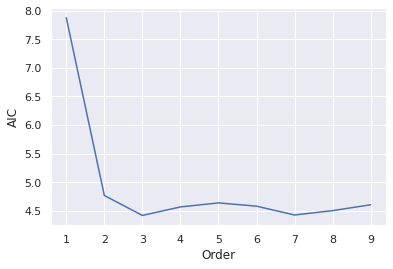

In [653]:
sns.set()
plt.plot(list(np.arange(1,10,1)), res_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [654]:
#selecting lowest order from above plot
results = var_model.fit(3)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Apr, 2021
Time:                     01:08:05
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.51318
Nobs:                     55.0000    HQIC:                   4.84168
Log likelihood:          -325.627    FPE:                    83.9765
AIC:                      4.41827    Det(Omega_mle):         50.8751
--------------------------------------------------------------------
Results for equation TotalBlackOrAfricanAmerican_Vacc
                                         coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
const                                  189319.849410    606062.938355            0.312           0.755
L1.TotalBlackOrAfricanAmerican_Vacc         1.61

In [655]:
lag_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= lag_values, steps=20), index = test1.index, columns= ['Adj_Total_Vacc', 'Adj_AfAmVacc_Dist','Black_Unemp_Rate'])

In [656]:
forecast.head()

Adj_Total_Vacc  Adj_AfAmVacc_Dist  Black_Unemp_Rate
DATE                                                           
2021-02-10   232885.725427          33.854084          9.867864
2021-02-11   240376.015338          36.919576          9.864231
2021-02-12   248068.327415          39.762437          9.860818
2021-02-13   255421.520938          42.051101          9.857823
2021-02-14   262660.655507          44.180001          9.855326

In [657]:
lag_values

array([[9.3694800e+04, 3.1763748e+01, 9.8645200e+00],
       [1.0589040e+05, 3.3630840e+01, 9.8677400e+00],
       [1.0754880e+05, 3.1085892e+01, 9.8709700e+00],
       [1.0852560e+05, 3.0292248e+01, 9.8741900e+00],
       [1.1702760e+05, 3.1379988e+01, 9.8774200e+00],
       [1.2692760e+05, 3.1999008e+01, 9.8806500e+00],
       [1.4064720e+05, 3.3521028e+01, 9.8838700e+00],
       [1.5321120e+05, 3.4053288e+01, 9.8871000e+00],
       [1.6447680e+05, 3.4042668e+01, 9.8903200e+00],
       [1.7208840e+05, 3.3558252e+01, 9.8935500e+00],
       [1.7315160e+05, 3.2326236e+01, 9.8967700e+00],
       [1.7412000e+05, 3.1985652e+01, 9.9000000e+00],
       [1.7601360e+05, 3.1786728e+01, 9.8964300e+00],
       [1.8256800e+05, 3.1854492e+01, 9.8928600e+00],
       [1.9696320e+05, 3.2722812e+01, 9.8892900e+00],
       [2.1363600e+05, 3.3693612e+01, 9.8857100e+00],
       [2.1559680e+05, 3.2087676e+01, 9.8821400e+00],
       [2.1815760e+05, 3.1613328e+01, 9.8785700e+00],
       [2.2297320e+05, 3.186

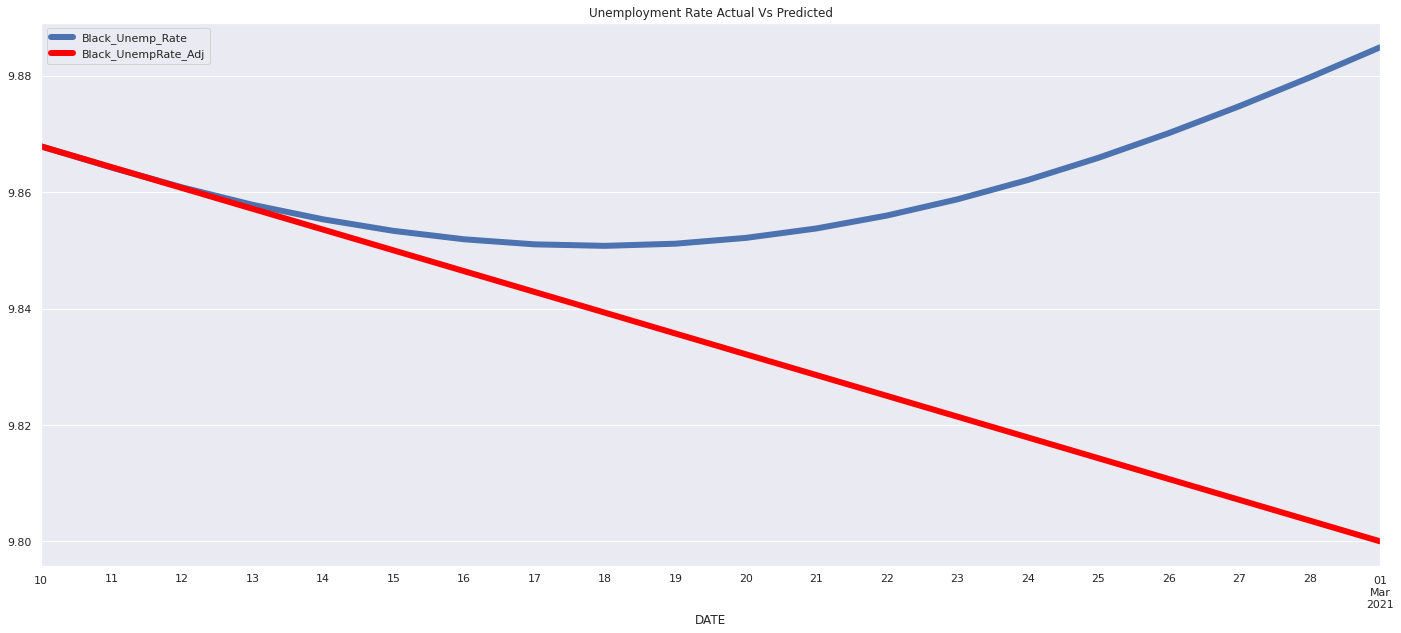

In [658]:
ax = forecast[['Black_Unemp_Rate']].plot(figsize=(24,10), lw=6, title='Unemployment Rate Actual Vs Predicted');
test1[['Black_UnempRate_Adj']].plot(ax=ax , color='red',lw=6)

In [659]:
Y_true = test1['Black_UnempRate_Adj'] 
  

Y_pred = forecast['Black_Unemp_Rate'] 
  
mse=mean_squared_error(Y_true,Y_pred) 
rmse=sqrt(mean_squared_error(Y_true,Y_pred))
mape=mean_absolute_error(Y_true,Y_pred)
evs=explained_variance_score(Y_true,Y_pred)
#me=max_error(Y_true,Y_pred)


print("MSE", mse)
print("RMSE", rmse)
print("MAPE", mape)
print("EVS", evs)

MSE 0.0014797442023759696
RMSE 0.03846744340836767
MAPE 0.027194972269887163
EVS -0.7459471527417132


In [660]:
df9.dtypes

PCE                                                 float64
Change                                              float64
White_PCE                                           float64
Black_PCE                                           float64
Asian_PCE                                           float64
HispanicOrLatino_PCE                                float64
laborforceparticipationrate                         float64
employment-populationratio                          float64
laborforce                                          float64
employment                                          float64
unemployment                                        float64
unemploymentrate                                    float64
White_UnempRate                                     float64
Black_UnempRate                                     float64
Asian_UnempRate                                     float64
HispanicOrLatino_UnempRate                          float64
African_American                        

In [661]:
#New DataFrame filtered down to the columns needed for VAR Model for White Demographic
vardata2 = df9[['TotalWhite_Vacc', 'WhiteVacc_Dist', 'White_UnempRate']]

In [662]:
vardata2=vardata2.dropna()

In [663]:
vardata2.head()

TotalWhite_Vacc  WhiteVacc_Dist  White_UnempRate
DATE                                                        
2020-12-14              2.0       100.00000          6.04194
2020-12-15              5.0        55.55556          6.04516
2020-12-16            361.0        66.23853          6.04839
2020-12-17           1100.0        69.48831          6.05161
2020-12-18           3116.0        70.44992          6.05484

In [664]:
#Reducing WHite Vacc Distributions by 20%
vardata2['TotalWhite_Vacc'] = vardata2['TotalWhite_Vacc'].multiply(.8)
vardata2['WhiteVacc_Dist'] = vardata2['WhiteVacc_Dist'].multiply(.8)

In [665]:
vardata2.head()

TotalWhite_Vacc  WhiteVacc_Dist  White_UnempRate
DATE                                                        
2020-12-14              1.6       80.000000          6.04194
2020-12-15              4.0       44.444448          6.04516
2020-12-16            288.8       52.990824          6.04839
2020-12-17            880.0       55.590648          6.05161
2020-12-18           2492.8       56.359936          6.05484

In [666]:
adftest = adfuller(vardata2['White_UnempRate'], autolag= "AIC")
print("ADF", adftest[0])
print("P Value", adftest[1])

ADF -0.4798328449390855
P Value 0.8958922620138112


In [667]:
adftest

(-0.4798328449390855,
 0.8958922620138112,
 1,
 76,
 {'1%': -3.5194805351545413,
  '10%': -2.5874984279778395,
  '5%': -2.9003945086747343},
 -746.1379166465105)

In [668]:
train = vardata2.iloc[:-20,:]
test1 = vardata2.iloc[-20:,:]

In [669]:
print(train.shape)
print(test1.shape)

(58, 3)
(20, 3)


In [670]:
test1.columns = ['Adj_Total_Vacc', 'Adj_White_Dist','White_UnempRate_Adj']

In [671]:
var_model = VAR(train)
res_aic = []
for p in range(1,10):
  res = var_model.fit(p)
  res_aic.append(res.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [672]:
test1.head()

Adj_Total_Vacc  Adj_White_Dist  White_UnempRate_Adj
DATE                                                           
2021-02-10        343240.0       45.641432              5.96786
2021-02-11        353135.2       44.975632              5.96429
2021-02-12        361921.6       44.218856              5.96071
2021-02-13        378821.6       44.202808              5.95714
2021-02-14        385628.0       43.954624              5.95357

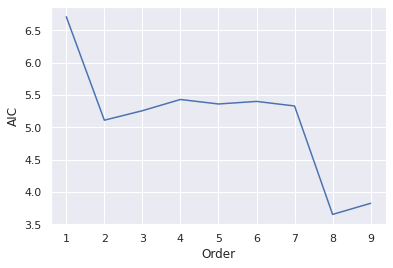

In [673]:
sns.set()
plt.plot(list(np.arange(1,10,1)), res_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [674]:
results = var_model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Apr, 2021
Time:                     01:08:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    6.52060
Nobs:                     50.0000    HQIC:                   4.74473
Log likelihood:          -229.155    FPE:                    51.8524
AIC:                      3.65257    Det(Omega_mle):         15.3637
--------------------------------------------------------------------
Results for equation TotalWhite_Vacc
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                -289896.595064    460231.859875           -0.630           0.529
L1.TotalWhite_Vacc         1.156328         0.187745            6.159           0.000
L1.WhiteVacc_Dist        -30.7

In [675]:
lag_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= lag_values, steps=20), index = test1.index, columns= ['Adj_Total_Vacc', 'Adj_White_Dist','White_Unemp_Rate'])

In [676]:
forecast.head()

Adj_Total_Vacc  Adj_White_Dist  White_Unemp_Rate
DATE                                                        
2021-02-10   344386.857594       44.552845          5.967392
2021-02-11   359327.051719       44.931767          5.963046
2021-02-12   376201.410789       46.482252          5.958564
2021-02-13   385906.923595       44.905362          5.954723
2021-02-14   393028.976266       43.818070          5.950585

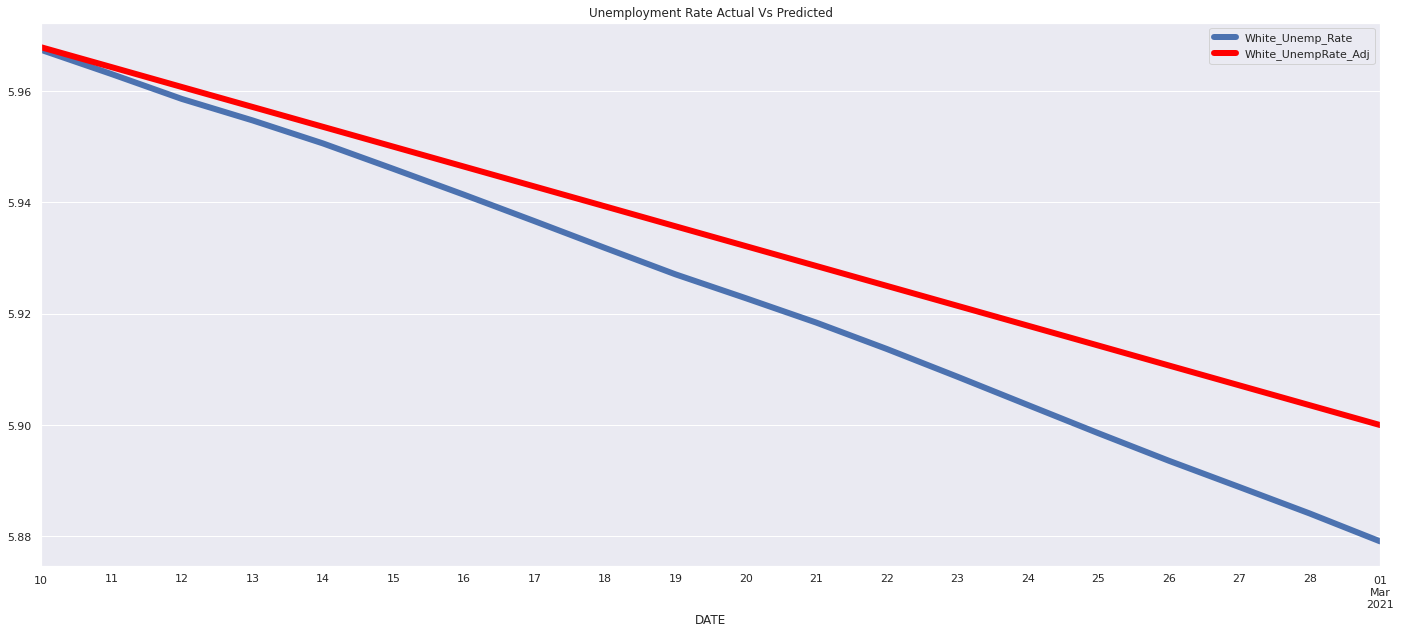

In [677]:
ax = forecast[['White_Unemp_Rate']].plot(figsize=(24,10), lw=6, title='Unemployment Rate Actual Vs Predicted');
test1[['White_UnempRate_Adj']].plot(ax=ax , color='red',lw=6)

In [678]:
Y_true = test1['White_UnempRate_Adj'] 
  

Y_pred = forecast['White_Unemp_Rate'] 
  
mse=mean_squared_error(Y_true,Y_pred) 
rmse=sqrt(mean_squared_error(Y_true,Y_pred))
mape=mean_absolute_error(Y_true,Y_pred)
evs=explained_variance_score(Y_true,Y_pred)
#me=max_error(Y_true,Y_pred)


print("MSE", mse)
print("RMSE", rmse)
print("MAPE", mape)
print("EVS", evs)

MSE 0.00013019091422315155
RMSE 0.01141012332199576
MAPE 0.009494175299145891
EVS 0.9055662423940216


In [679]:
vardata3 = df9[['TotalBlackOrAfricanAmerican_Vacc', 'AfAmVacc_Dist', 'Black_PCE']]

In [680]:
vardata3=vardata3.dropna()

In [681]:
vardata3

TotalBlackOrAfricanAmerican_Vacc  AfAmVacc_Dist  Black_PCE
DATE                                                                  
2020-12-14                               0.0        0.00000   -1.23484
2020-12-15                               3.0       33.33333   -1.15290
2020-12-16                              73.0       13.39450   -1.07097
2020-12-17                             187.0       11.81301   -0.98903
2020-12-18                             484.0       10.94280   -0.90710
...                                      ...            ...        ...
2021-02-25                          281799.0       23.72431    0.65000
2021-02-26                          290773.0       23.70857    0.66500
2021-02-27                          297093.0       23.39650    0.68000
2021-02-28                          303615.0       23.23091    0.69500
2021-03-01                          313845.0       23.55154    0.71000

[78 rows x 3 columns]

In [682]:
vardata3['TotalBlackOrAfricanAmerican_Vacc'] = vardata3['TotalBlackOrAfricanAmerican_Vacc'].multiply(1.2)
vardata3['AfAmVacc_Dist'] = vardata3['AfAmVacc_Dist'].multiply(1.2)

In [683]:
adftest = adfuller(vardata3['Black_PCE'], autolag= "AIC")
print("ADF", adftest[0])
print("P Value", adftest[1])

ADF -2.517769589670819
P Value 0.11121043745322373


In [684]:
adftest

(-2.517769589670819,
 0.11121043745322373,
 1,
 76,
 {'1%': -3.5194805351545413,
  '10%': -2.5874984279778395,
  '5%': -2.9003945086747343},
 -417.2697704488696)

In [685]:
train = vardata3.iloc[:-20,:]
test1 = vardata3.iloc[-20:,:]

In [686]:
print(train.shape)
print(test1.shape)

(58, 3)
(20, 3)


In [687]:
test1.columns = ['Adj_Total_Vacc', 'Adj_AfAmVacc_Dist','Black_PCE_Adj']

In [688]:
var_model = VAR(train)
res_aic = []
for p in range(1,10):
  res = var_model.fit(p)
  res_aic.append(res.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


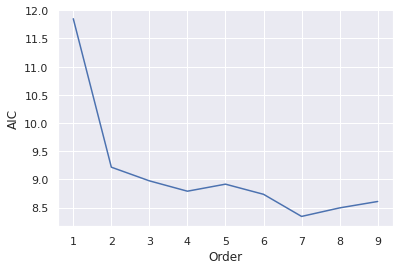

In [689]:
sns.set()
plt.plot(list(np.arange(1,10,1)), res_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [690]:
results = var_model.fit(7)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Apr, 2021
Time:                     01:08:09
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    10.8420
Nobs:                     51.0000    HQIC:                   9.29729
Log likelihood:          -363.818    FPE:                    5030.24
AIC:                      8.34197    Det(Omega_mle):         1715.26
--------------------------------------------------------------------
Results for equation TotalBlackOrAfricanAmerican_Vacc
                                         coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
const                                   13094.240226      7762.163914            1.687           0.092
L1.TotalBlackOrAfricanAmerican_Vacc         1.67

In [691]:
lag_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= lag_values, steps=20), index = test1.index, columns= ['Adj_Total_Vacc', 'Adj_AfAmVacc_Dist','Black_PCE'])

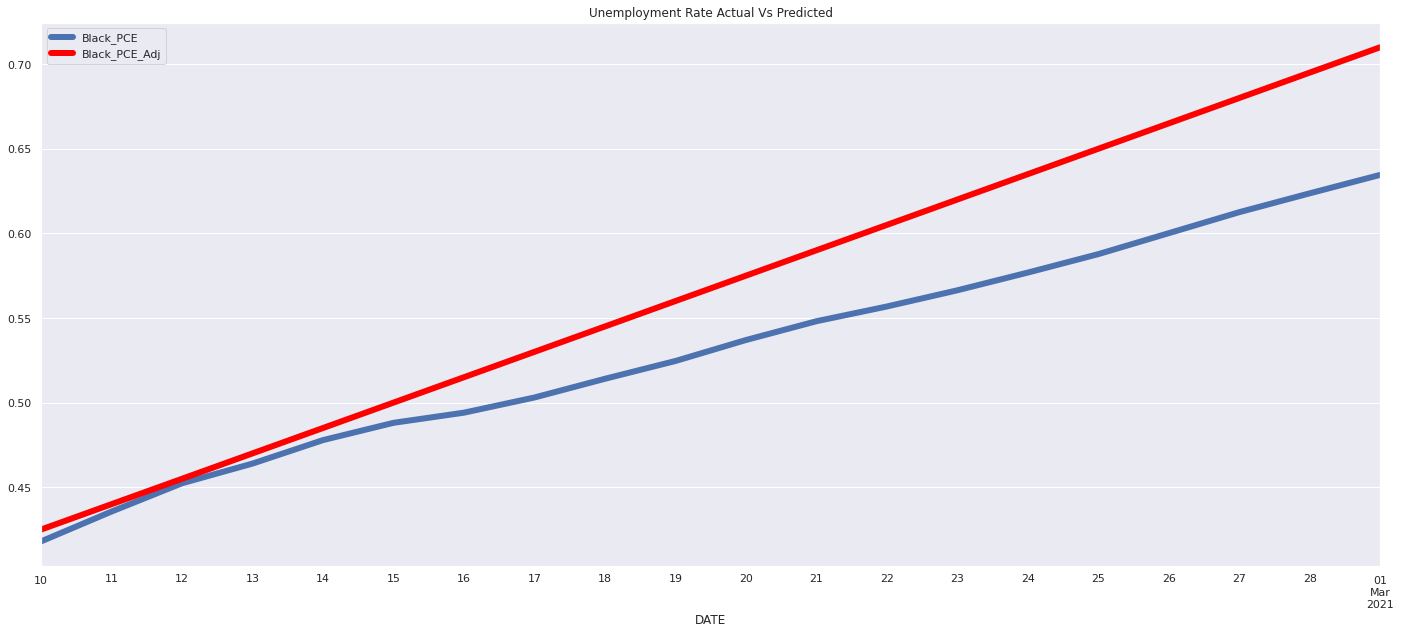

In [692]:
ax = forecast[['Black_PCE']].plot(figsize=(24,10), lw=6, title='Unemployment Rate Actual Vs Predicted');
test1[['Black_PCE_Adj']].plot(ax=ax , color='red',lw=6)

## Long short-term memory (LSTM) Model

In [693]:
lstmdf = df9[['Black_UnempRate','TotalBlackOrAfricanAmerican_Vacc', 'AfAmVacc_Dist']]

In [694]:
lstmdf.head()

Black_UnempRate  TotalBlackOrAfricanAmerican_Vacc  AfAmVacc_Dist
DATE                                                                        
2020-03-01          6.80000                               NaN            NaN
2020-03-02          7.08710                               NaN            NaN
2020-03-03          7.37419                               NaN            NaN
2020-03-04          7.66129                               NaN            NaN
2020-03-05          7.94839                               NaN            NaN

In [695]:
lstmdf=lstmdf.dropna()

In [696]:
lstmdf['TotalBlackOrAfricanAmerican_Vacc'] = lstmdf['TotalBlackOrAfricanAmerican_Vacc'].multiply(1.2)
lstmdf['AfAmVacc_Dist'] = lstmdf['AfAmVacc_Dist'].multiply(1.2)

In [697]:
 lstmdf

Black_UnempRate  TotalBlackOrAfricanAmerican_Vacc  AfAmVacc_Dist
DATE                                                                        
2020-12-14          9.85806                               0.0       0.000000
2020-12-15          9.85484                               3.6      39.999996
2020-12-16          9.85161                              87.6      16.073400
2020-12-17          9.84839                             224.4      14.175612
2020-12-18          9.84516                             580.8      13.131360
...                     ...                               ...            ...
2021-02-25          9.81429                          338158.8      28.469172
2021-02-26          9.81071                          348927.6      28.450284
2021-02-27          9.80714                          356511.6      28.075800
2021-02-28          9.80357                          364338.0      27.877092
2021-03-01          9.80000                          376614.0      28.261848

[78 rows x 3 columns]

In [698]:
values = lstmdf.values
#values = values.astype('float32')
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

In [699]:
values

array([[9.8580600e+00, 0.0000000e+00, 0.0000000e+00],
       [9.8548400e+00, 3.6000000e+00, 3.9999996e+01],
       [9.8516100e+00, 8.7600000e+01, 1.6073400e+01],
       [9.8483900e+00, 2.2440000e+02, 1.4175612e+01],
       [9.8451600e+00, 5.8080000e+02, 1.3131360e+01],
       [9.8419400e+00, 7.1040000e+02, 1.3495440e+01],
       [9.8387100e+00, 7.4880000e+02, 1.3526016e+01],
       [9.8354800e+00, 1.9296000e+03, 2.0908008e+01],
       [9.8322600e+00, 2.9424000e+03, 1.9125120e+01],
       [9.8290300e+00, 3.9768000e+03, 1.9121064e+01],
       [9.8258100e+00, 4.5480000e+03, 1.9419300e+01],
       [9.8225800e+00, 4.7292000e+03, 1.9343916e+01],
       [9.8193500e+00, 5.1072000e+03, 1.9600104e+01],
       [9.8161300e+00, 5.4000000e+03, 1.9416084e+01],
       [9.8129000e+00, 6.8544000e+03, 1.8835944e+01],
       [9.8096800e+00, 8.7504000e+03, 1.8751524e+01],
       [9.8064500e+00, 1.5531600e+04, 2.6419680e+01],
       [9.8032300e+00, 2.0385600e+04, 3.0872772e+01],
       [9.8000000e+00, 2.063

In [700]:
def series_to_supervised(data, n_in=1, out=1, dropnan=True):
	vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [701]:
df12 = series_to_supervised(scaled,1,1)

In [702]:
df12

var1(t-1)  var2(t-1)  var3(t-1)  var1(t)   var2(t)   var3(t)
1      0.5806   0.000000   0.000000   0.5484  0.000010  0.873923
2      0.5484   0.000010   0.873923   0.5161  0.000233  0.351173
3      0.5161   0.000233   0.351173   0.4839  0.000596  0.309710
4      0.4839   0.000596   0.309710   0.4516  0.001542  0.286895
5      0.4516   0.001542   0.286895   0.4194  0.001886  0.294849
..        ...        ...        ...      ...       ...       ...
73     0.1786   0.884720   0.633424   0.1429  0.897892  0.621997
74     0.1429   0.897892   0.621997   0.1071  0.926486  0.621584
75     0.1071   0.926486   0.621584   0.0714  0.946623  0.613402
76     0.0714   0.946623   0.613402   0.0357  0.967404  0.609061
77     0.0357   0.967404   0.609061   0.0000  1.000000  0.617467

[77 rows x 6 columns]

In [703]:
col = [x for x in df12.columns if '(t)' in x]
col = col[:-1]

In [704]:
df12.drop(col,axis=1,inplace=True)

In [705]:
df12.head()

var1(t-1)  var2(t-1)  var3(t-1)   var3(t)
1     0.5806   0.000000   0.000000  0.873923
2     0.5484   0.000010   0.873923  0.351173
3     0.5161   0.000233   0.351173  0.309710
4     0.4839   0.000596   0.309710  0.286895
5     0.4516   0.001542   0.286895  0.294849

In [706]:
df12.drop('var3(t-1)',axis=1,inplace=True)

In [707]:
df12.head()

var1(t-1)  var2(t-1)   var3(t)
1     0.5806   0.000000  0.873923
2     0.5484   0.000010  0.351173
3     0.5161   0.000233  0.309710
4     0.4839   0.000596  0.286895
5     0.4516   0.001542  0.294849

In [708]:
values = df12.values
sample = 57
train = values[:sample, :]
test = values[sample:, :]

In [709]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(57, 1, 2) (57,) (20, 1, 2) (20,)


Epoch 1/100
4/4 - 3s - loss: 0.6336 - val_loss: 0.6180
Epoch 2/100
4/4 - 0s - loss: 0.6147 - val_loss: 0.5959
Epoch 3/100
4/4 - 0s - loss: 0.5957 - val_loss: 0.5734
Epoch 4/100
4/4 - 0s - loss: 0.5764 - val_loss: 0.5503
Epoch 5/100
4/4 - 0s - loss: 0.5568 - val_loss: 0.5267
Epoch 6/100
4/4 - 0s - loss: 0.5368 - val_loss: 0.5024
Epoch 7/100
4/4 - 0s - loss: 0.5162 - val_loss: 0.4772
Epoch 8/100
4/4 - 0s - loss: 0.4948 - val_loss: 0.4510
Epoch 9/100
4/4 - 0s - loss: 0.4726 - val_loss: 0.4236
Epoch 10/100
4/4 - 0s - loss: 0.4495 - val_loss: 0.3948
Epoch 11/100
4/4 - 0s - loss: 0.4253 - val_loss: 0.3645
Epoch 12/100
4/4 - 0s - loss: 0.3998 - val_loss: 0.3325
Epoch 13/100
4/4 - 0s - loss: 0.3729 - val_loss: 0.2986
Epoch 14/100
4/4 - 0s - loss: 0.3446 - val_loss: 0.2629
Epoch 15/100
4/4 - 0s - loss: 0.3151 - val_loss: 0.2252
Epoch 16/100
4/4 - 0s - loss: 0.2871 - val_loss: 0.1863
Epoch 17/100
4/4 - 0s - loss: 0.2598 - val_loss: 0.1462
Epoch 18/100
4/4 - 0s - loss: 0.2322 - val_loss: 0.1043
E

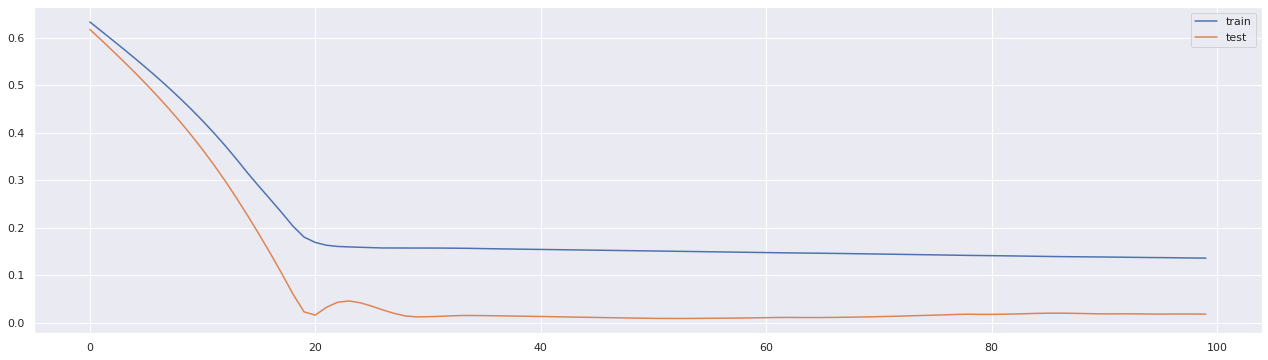

In [710]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=16, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.figure(figsize=(22,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [711]:
yhat = model.predict(test_X)

In [712]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [713]:
yhat

array([[0.703099  ],
       [0.7001741 ],
       [0.6975936 ],
       [0.6931686 ],
       [0.6926919 ],
       [0.6889609 ],
       [0.6853608 ],
       [0.681865  ],
       [0.6788687 ],
       [0.6747589 ],
       [0.67022467],
       [0.667988  ],
       [0.66266227],
       [0.65734106],
       [0.6527488 ],
       [0.6498355 ],
       [0.645483  ],
       [0.64285386],
       [0.6392581 ],
       [0.63571674]], dtype=float32)

In [714]:
test_X

array([[0.7143    , 0.60233873],
       [0.6786    , 0.62514298],
       [0.6429    , 0.65107617],
       [0.6071    , 0.66176297],
       [0.5714    , 0.70603961],
       [0.5357    , 0.7228632 ],
       [0.5       , 0.74098679],
       [0.4643    , 0.76018735],
       [0.4286    , 0.78389332],
       [0.3929    , 0.79814877],
       [0.3571    , 0.80902038],
       [0.3214    , 0.83988912],
       [0.2857    , 0.84401536],
       [0.25      , 0.84833596],
       [0.2143    , 0.85913747],
       [0.1786    , 0.88472016],
       [0.1429    , 0.89789227],
       [0.1071    , 0.926486  ],
       [0.0714    , 0.94662333],
       [0.0357    , 0.96740429]])

In [715]:
yhat.shape

(20, 1)

In [716]:
test_X.shape

(20, 2)

In [717]:
inv_yhat = concatenate((yhat, test_X[:, 0:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [718]:
inv_yhat

array([9.8703099 , 9.87001741, 9.86975936, 9.86931686, 9.86926919,
       9.86889609, 9.86853608, 9.8681865 , 9.86788687, 9.86747589,
       9.86702247, 9.8667988 , 9.86626623, 9.86573411, 9.86527488,
       9.86498355, 9.8645483 , 9.86428539, 9.86392581, 9.86357167])

In [719]:
df13= pd.DataFrame(df9['CumulativeTotalVaccinated'])

In [720]:
df13=df13.dropna()

In [721]:
df13

CumulativeTotalVaccinated
DATE                                 
2020-12-14                        2.0
2020-12-15                        9.0
2020-12-16                      545.0
2020-12-17                     1583.0
2020-12-18                     4423.0
...                               ...
2021-02-25                  1187807.0
2021-02-26                  1226447.0
2021-02-27                  1269818.0
2021-02-28                  1306944.0
2021-03-01                  1332588.0

[78 rows x 1 columns]

In [722]:
df13 = df13.iloc[-20:,:]

In [723]:
df13['LSTM_Predictions_Rate'] = inv_yhat
df13['BlackUnempRate'] = df9['Black_UnempRate']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [724]:
df13

CumulativeTotalVaccinated  LSTM_Predictions_Rate  BlackUnempRate
DATE                                                                        
2021-02-10                   752036.0               9.870310         9.86786
2021-02-11                   785170.0               9.870017         9.86429
2021-02-12                   818478.0               9.869759         9.86071
2021-02-13                   857008.0               9.869317         9.85714
2021-02-14                   877332.0               9.869269         9.85357
2021-02-15                   893860.0               9.868896         9.85000
2021-02-16                   908979.0               9.868536         9.84643
2021-02-17                   936557.0               9.868186         9.84286
2021-02-18                   970457.0               9.867887         9.83929
2021-02-19                  1013049.0               9.867476         9.83571
2021-02-20                  1044590.0               9.867022         9.83214
2021-02-21                  1067346.0               9.866799         9.82857
2021-02-22                  1087086.0               9.866266         9.82500
2021-02-23                  1112651.0               9.865734         9.82143
2021-02-24                  1149267.0               9.865275         9.81786
2021-02-25                  1187807.0               9.864984         9.81429
2021-02-26                  1226447.0               9.864548         9.81071
2021-02-27                  1269818.0               9.864285         9.80714
2021-02-28                  1306944.0               9.863926         9.80357
2021-03-01                  1332588.0               9.863572         9.80000

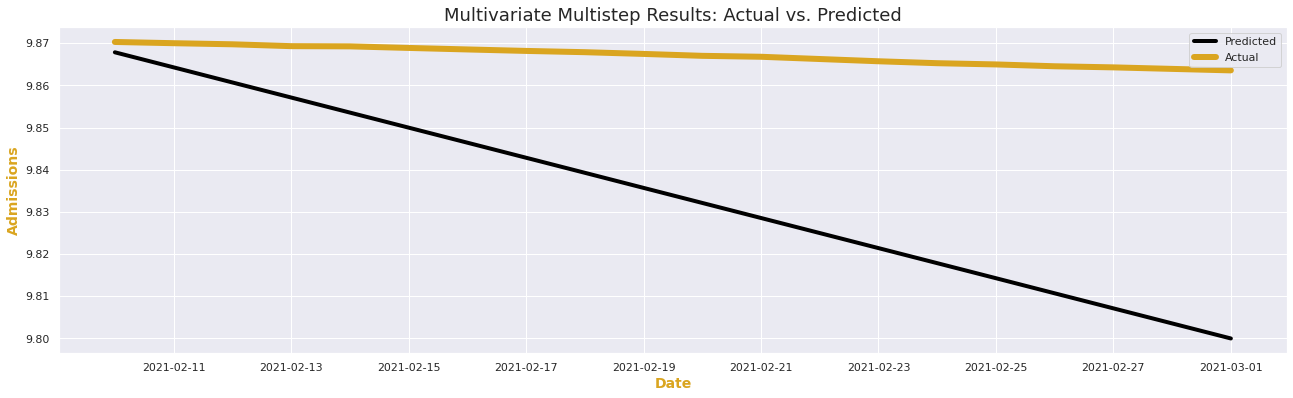

In [725]:
plt.figure(figsize=(22,6))
plt.plot(df13['BlackUnempRate'],label='Predicted',color='black',linewidth=4.0)
plt.plot(df13['LSTM_Predictions_Rate'],label='Actual',color='goldenrod',linewidth=6.0)
plt.title('Multivariate Multistep Results: Actual vs. Predicted',fontsize=18)
plt.xlabel('Date',fontsize=14,color='goldenrod',fontweight='bold')
plt.ylabel('Admissions',fontsize=14,color='goldenrod',fontweight='bold')
plt.legend()
plt.show()

In [726]:
Y_true = df13['LSTM_Predictions_Rate'] 
  

Y_pred = df13['BlackUnempRate'] 
  
mse=mean_squared_error(Y_true,Y_pred) 
rmse=sqrt(mean_squared_error(Y_true,Y_pred))
mape=mean_absolute_error(Y_true,Y_pred)
evs=explained_variance_score(Y_true,Y_pred)
#me=max_error(Y_true,Y_pred)


print("MSE", mse)
print("RMSE", rmse)
print("MAPE", mape)
print("EVS", evs)
#print(me)

MSE 0.0014419895755068276
RMSE 0.037973537832375164
MAPE 0.03317476790809666
EVS -74.73611110598843


## Multilayer Perceptron (MLP) Model

In [727]:
mlpdf = df9[['Black_UnempRate']]

In [728]:
mlpdftest = mlpdf.iloc[-20:,:]

In [729]:
mlpdftest

Black_UnempRate
DATE                       
2021-02-10          9.86786
2021-02-11          9.86429
2021-02-12          9.86071
2021-02-13          9.85714
2021-02-14          9.85357
2021-02-15          9.85000
2021-02-16          9.84643
2021-02-17          9.84286
2021-02-18          9.83929
2021-02-19          9.83571
2021-02-20          9.83214
2021-02-21          9.82857
2021-02-22          9.82500
2021-02-23          9.82143
2021-02-24          9.81786
2021-02-25          9.81429
2021-02-26          9.81071
2021-02-27          9.80714
2021-02-28          9.80357
2021-03-01          9.80000

In [730]:
mlpdftest=mlpdftest.values

In [731]:
mlpdftest = mlpdftest.flatten()

In [732]:
mlpdftest

array([9.86786, 9.86429, 9.86071, 9.85714, 9.85357, 9.85   , 9.84643,
       9.84286, 9.83929, 9.83571, 9.83214, 9.82857, 9.825  , 9.82143,
       9.81786, 9.81429, 9.81071, 9.80714, 9.80357, 9.8    ])

In [733]:
vals = mlpdftest.tolist()

In [734]:
vals

[9.86786,
 9.86429,
 9.86071,
 9.85714,
 9.85357,
 9.85,
 9.84643,
 9.84286,
 9.83929,
 9.83571,
 9.83214,
 9.82857,
 9.825,
 9.82143,
 9.81786,
 9.81429,
 9.81071,
 9.80714,
 9.80357,
 9.8]

In [735]:
#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
 X, y = list(), list()
 for i in range(len(sequence)):
  # find the end of this pattern
  end_ix = i + n_steps
  # check if we are beyond the sequence
  if end_ix > len(sequence)-1:
   break
  #input and output sample
  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)


In [736]:
n_steps = 3
#split into samples
X, y = split_sequence(vals, n_steps)
#define model
model = Sequential()
model.add(Dense(150, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics =['accuracy'])
#fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 410ms/step - loss: 104.7994 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 97.4758 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 90.4281 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 83.7126 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 77.2805 - accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 15ms/step - loss: 71.1376 - accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 65.3221 - accuracy: 0.0000e+00
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 59.7926 - accuracy: 0.0000e+00
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 54.5802 - accuracy: 0.0000e+00
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 49.66

In [737]:
vals

[9.86786,
 9.86429,
 9.86071,
 9.85714,
 9.85357,
 9.85,
 9.84643,
 9.84286,
 9.83929,
 9.83571,
 9.83214,
 9.82857,
 9.825,
 9.82143,
 9.81786,
 9.81429,
 9.81071,
 9.80714,
 9.80357,
 9.8]

In [738]:
mlpdf.iloc[-25:,:]

Black_UnempRate
DATE                       
2021-02-05          9.88571
2021-02-06          9.88214
2021-02-07          9.87857
2021-02-08          9.87500
2021-02-09          9.87143
2021-02-10          9.86786
2021-02-11          9.86429
2021-02-12          9.86071
2021-02-13          9.85714
2021-02-14          9.85357
2021-02-15          9.85000
2021-02-16          9.84643
2021-02-17          9.84286
2021-02-18          9.83929
2021-02-19          9.83571
2021-02-20          9.83214
2021-02-21          9.82857
2021-02-22          9.82500
2021-02-23          9.82143
2021-02-24          9.81786
2021-02-25          9.81429
2021-02-26          9.81071
2021-02-27          9.80714
2021-02-28          9.80357
2021-03-01          9.80000

In [739]:
#Pred #1
x = array([9.878,9.875,9.871])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#2
x = array([9.875,9.871,9.867])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#3
x = array([9.871,9.867,9.863])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#4
x = array([9.867,9.863,9.859])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#5
x = array([9.863,9.859,9.856])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#6
x = array([9.859,9.856,9.852])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#7
x = array([9.859,9.856,9.848])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#8
x = array([9.856,9.848,9.847])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#9
x = array([9.856,9.848,9.847])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)


#Pred#10
x = array([9.848,9.847,9.843])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#11
x = array([9.847,9.843,9.818])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#12
x = array([9.843,9.818,9.811])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#13
x = array([9.818,9.811,9.752])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#13
x = array([9.811,9.752,9.732])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#14
x = array([9.752,9.732,9.615])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#15
x = array([9.732,9.615,9.558])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#16
x = array([9.615,9.558,9.552])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#17
x = array([9.558,9.552,9.233])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#18
x = array([9.552,9.233,9.124])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#19
x = array([9.233,9.124,8.834])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

#Pred#19
x = array([9.124,8.834,8.681])
x = x.reshape((1, n_steps))
yhat = model.predict(x, verbose=0)
print(yhat)

[[9.866256]]
[[9.862732]]
[[9.858833]]
[[9.854934]]
[[9.851222]]
[[9.847742]]
[[9.846996]]
[[9.842366]]
[[9.842366]]
[[9.838224]]
[[9.831541]]
[[9.818356]]
[[9.79515]]
[[9.7642975]]
[[9.712226]]
[[9.645536]]
[[9.577098]]
[[9.494029]]
[[9.338233]]
[[9.120648]]
[[8.9301815]]


In [740]:
mlpvals = [9.866948,9.863423,9.859506, 9.855584,9.852015,9.8483305,9.846941,9.843511,9.83872,9.8286915,9.818753,9.786711,9.763014,9.694289,9.638855,9.576983,9.442958,9.326494,9.074375,8.908821] 

In [741]:
df14 = pd.DataFrame(mlpvals, columns = ['MLP_Pred'])

In [742]:
df14

MLP_Pred
0   9.866948
1   9.863423
2   9.859506
3   9.855584
4   9.852015
5   9.848330
6   9.846941
7   9.843511
8   9.838720
9   9.828691
10  9.818753
11  9.786711
12  9.763014
13  9.694289
14  9.638855
15  9.576983
16  9.442958
17  9.326494
18  9.074375
19  8.908821

In [743]:
df14['DATE'] = pd.date_range(start='2/10/2021', periods=len(df14), freq='D')

In [744]:
df14 = df14[['DATE','MLP_Pred']]

In [745]:
df14=df14.set_index('DATE')

In [746]:
df14['Black_UnempRate'] = mlpdf[['Black_UnempRate']]

In [747]:
df14

MLP_Pred  Black_UnempRate
DATE                                 
2021-02-10  9.866948          9.86786
2021-02-11  9.863423          9.86429
2021-02-12  9.859506          9.86071
2021-02-13  9.855584          9.85714
2021-02-14  9.852015          9.85357
2021-02-15  9.848330          9.85000
2021-02-16  9.846941          9.84643
2021-02-17  9.843511          9.84286
2021-02-18  9.838720          9.83929
2021-02-19  9.828691          9.83571
2021-02-20  9.818753          9.83214
2021-02-21  9.786711          9.82857
2021-02-22  9.763014          9.82500
2021-02-23  9.694289          9.82143
2021-02-24  9.638855          9.81786
2021-02-25  9.576983          9.81429
2021-02-26  9.442958          9.81071
2021-02-27  9.326494          9.80714
2021-02-28  9.074375          9.80357
2021-03-01  8.908821          9.80000

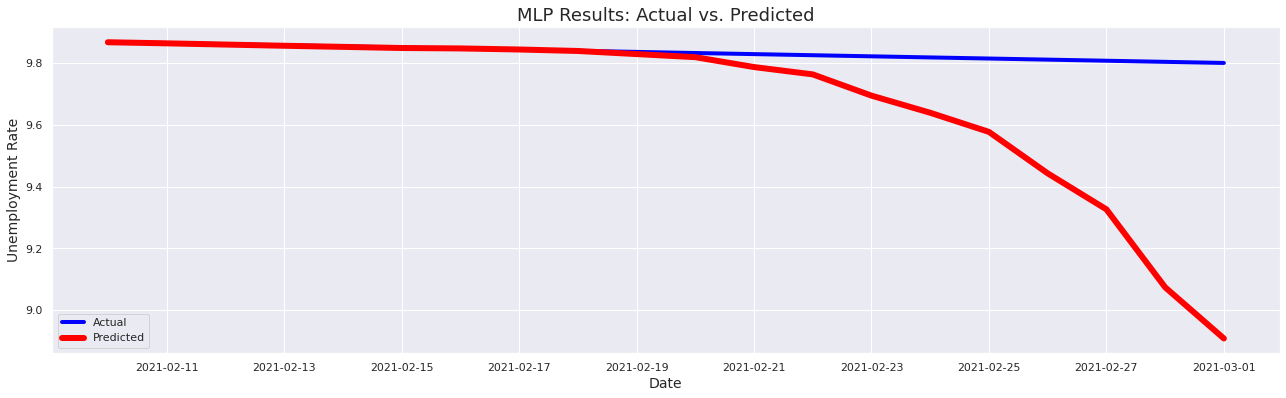

In [748]:
plt.figure(figsize=(22,6))
plt.plot(df14['Black_UnempRate'],label='Actual',color='blue',linewidth=4.0)
plt.plot(df14['MLP_Pred'],label='Predicted',color='red',linewidth=6.0)
plt.title('MLP Results: Actual vs. Predicted',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Unemployment Rate',fontsize=14)
plt.legend()
plt.show()

# Conclusions